##### Ana Cristina Zanetti
##### Mauro Roberto Domingues Junior


---



# Aprendizado Supervisionado

## Descrição do problema e explanação dos dados

##### Construir um modelo de aprendizado supervisionado que possa classificar a pontuação de crédito de um cliente em poor, standard ou good.

##### Para construir este modelo, será utilizado um histórico de clientes disponibilizado em arquivo que contém:

1. ID -> Representa a identificação única para um registro de entrada
1. Customer_ID -> Representa a identificação única de um cliente
1. Month -> Representa o mês de criação do registro
1. Name -> Representa o nome do cliente
1. Age -> Representa a idade do cliente
1. SSN - Seguro social -> Representa o número de seguro social do cliente
1. Occupation -> Representa a ocupação/profissão do cliente
1. Annual_Income0- Renda Anual -> Representa a renda anual do cliente
1. Monthly_Inhand_Salary -> Representa o salário base mensal do cliente
1. Num_Bank_Accounts -> Representa o número de contas bancárias que o cliente possui
1. Num_Credit_Card -> Representa o número de cartões de crédito detidos pelo cliente
1. Interest_Rate -> Representa a taxa de juros
1. Num_of_Loan -> Representa o número de empréstimos contraídos no banco
1. Type_of_Loan -> Representa os tipos de empréstimo tomados pelo cliente
1. Delay_from_due_date -> Representa o número médio de dias de atraso desde a data de pagamento
1. Num_of_Delayed_Payment -> Representa o número médio de pagamentos atrasados ​​pelo cliente
1. Changed_Credit_Limit -> Representa a variação percentual no limite de crédito
1. Num_Credit_Inquiries -> Representa o número de consultas ao crédito
1. Credit_Mix -> Representa a classificação do mix de créditos
1. Outstanding_Debt -> Representa o total da dívida atual a ser paga (em USD)
1. Credit_Utilization_Ratio -> Representa a taxa de utilização de crédito
1. Credit_History_Age -> Representa a idade do histórico de crédito do cliente
1. Payment_of_Min_Amount -> Representa se apenas o valor mínimo foi pago pelo cliente
1. Total_EMI_per_month -> Representa os pagamentos mensais do EMI (parcelas do empréstimo em USD)
1. Amount_invested_monthly -> Representa o valor mensal investido pelo cliente (em USD)
1. Payment_Behaviour -> Representa o comportamento de pagamento do cliente (em USD)
1. Monthly_Balance -> Representa o valor do saldo mensal do cliente (em USD)
1. Credit_Score -> Representa a faixa de pontuação de crédito (ruim, padrão, bom)



## Análise de Dados Exploratória (*EDA*)

##### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

##### Carregando o conjunto de dados

In [2]:
df_credito = pd.read_csv('supervisionado/dataset/train.csv')
df_credito.head()

C:\Users\mauro\AppData\Local\Temp\ipykernel_13188\3158571181.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credito = pd.read_csv('supervisionado/dataset/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


*Observado já na carga,que a coluna Monthly_Balance, precisa ser trabalhada, tem vários tipos de dados, porém deveria ser numérica*

##### Informações sobre o dataset

In [3]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

*Muitos campos numéricos estão como object*

##### Todas as colunas relacionadas à identificação únicas de registros ou de cliente serão excluídas por não contribuírem para o Credit Score

In [4]:
colunas_excluir = ['ID', 'Customer_ID', 'Name','SSN']
df_credito = df_credito.drop(colunas_excluir, axis=1)

##### Quantidade de valores únicos por coluna e os valores

In [5]:
for column in df_credito.columns:
    unique_counts = df_credito[column].nunique()
    print(f"'{column}' tem {unique_counts} valores únicos")
    unique_values = df_credito[column].unique()
    if unique_counts > 30:
        print(unique_values[:30])
        print(f"({unique_counts - 30} valores adicionais não exibidos)")
    else:
        print(unique_values)
    print() 

'Month' tem 8 valores únicos
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

'Age' tem 1788 valores únicos
['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46']
(1758 valores adicionais não exibidos)

'Occupation' tem 16 valores únicos
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

'Annual_Income' tem 18940 valores únicos
['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4' '10909427.0' '34081.38_'
 '34081.38' '114838.41' '114838.41_' '31370.8' '33751.27' '88640.24'
 '88640.24_' '54392.16' '54392.16_' '8701.545' '8701.545_' '25546.26'
 '25546.26_' '31993.78' '92047.08' '92047.08_' '32284.62' '97791.42']
(18910 valores adicionais não exibidos)

'Monthly_Inh

Observado:
* caracteres não numéricos em colunas numéricas -> Exxluir e transformar em numero
* colunas numéricas com muitos tipos únicos por terem muitas casas decimais ->Arredondar
* coluna mês somente com 8 meses -> Excluir coluna
* colunas categórcias com caracteres estranhos

##### Funções para Limpeza dos dados

In [6]:
# Remover caracteres não numericos
def remover_nao_numericos(coluna):
      return coluna.apply(lambda valor: re.sub(r'[^-\d.]', '', str(valor)))

# Transformar em número
def transformar_em_numero(coluna):
      return pd.to_numeric(coluna, errors='coerce')

# Limpar valores negativos
def limpar_valores_negativos(coluna):
      return coluna.apply(lambda valor: None if valor < 0 else valor)

# Delimitar valores das colunas
def delimitar_valores(coluna, limite_inferior, limite_superior):
        return coluna.apply(lambda valor: valor if limite_inferior <= valor <= limite_superior else np.nan)  


##### Excluir coluna Month

In [7]:
df_credito = df_credito.drop('Month', axis=1)

##### Converter os dados

In [8]:
colunas_converter_numericas = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [9]:
colunas_converter_cat = ['Occupation',  'Type_of_Loan', 'Credit_Mix','Payment_of_Min_Amount','Credit_Score','Payment_Behaviour']
df_credito[colunas_converter_cat] = df_credito[colunas_converter_cat].astype('category')

In [10]:
for coluna in colunas_converter_numericas:
    df_credito[coluna] = remover_nao_numericos(df_credito[coluna])
    df_credito[coluna] = transformar_em_numero(df_credito[coluna])

In [11]:
colunas_float = df_credito.select_dtypes(include='float64').columns
df_credito[colunas_float] = df_credito[colunas_float].round(2)

In [12]:
df_credito['Occupation'] = df_credito['Occupation'].replace('_______', None)
df_credito['Credit_Mix'] = df_credito['Credit_Mix'].replace('_', None)
df_credito['Payment_Behaviour'] = df_credito['Payment_Behaviour'].replace('!@9#%8', None)

In [13]:
for column in df_credito.columns:
    unique_counts = df_credito[column].nunique()
    print(f"'{column}' tem {unique_counts} valores únicos")  

'Age' tem 1728 valores únicos
'Occupation' tem 15 valores únicos
'Annual_Income' tem 13485 valores únicos
'Monthly_Inhand_Salary' tem 13124 valores únicos
'Num_Bank_Accounts' tem 943 valores únicos
'Num_Credit_Card' tem 1179 valores únicos
'Interest_Rate' tem 1750 valores únicos
'Num_of_Loan' tem 414 valores únicos
'Type_of_Loan' tem 6260 valores únicos
'Delay_from_due_date' tem 73 valores únicos
'Num_of_Delayed_Payment' tem 711 valores únicos
'Changed_Credit_Limit' tem 3634 valores únicos
'Num_Credit_Inquiries' tem 1223 valores únicos
'Credit_Mix' tem 3 valores únicos
'Outstanding_Debt' tem 12203 valores únicos
'Credit_Utilization_Ratio' tem 2478 valores únicos
'Credit_History_Age' tem 404 valores únicos
'Payment_of_Min_Amount' tem 3 valores únicos
'Total_EMI_per_month' tem 12439 valores únicos
'Amount_invested_monthly' tem 38633 valores únicos
'Payment_Behaviour' tem 6 valores únicos
'Monthly_Balance' tem 48896 valores únicos
'Credit_Score' tem 3 valores únicos


In [14]:
for column in df_credito.columns:
    unique_values = df_credito[column].unique()
   
    if unique_counts > 30:
        print(f"'{column}': {unique_values[:30]}")  
    else:
        print(f"'{column}': {unique_values}")  
    print()

'Age': [  23 -500   28 ... 4808 2263 1342]

'Occupation': ['Scientist', NaN, 'Teacher', 'Engineer', 'Entrepreneur', ..., 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']
Length: 16
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician', 'Scientist', 'Teacher', 'Writer']

'Annual_Income': [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]

'Monthly_Inhand_Salary': [1824.84     nan 3037.99 ... 3097.01 1929.91 3359.42]

'Num_Bank_Accounts': [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   38  619  555 1769  280  752 1201  8

##### Dados Numéricos

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_credito.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.00,110.65,686.24,-500.00,24.00,33.00,42.00,8698.00
Annual_Income,100000.00,176415.70,1429618.05,7005.93,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,84998.00,4194.17,3183.69,303.65,1625.57,3093.75,5957.45,15204.63
Num_Bank_Accounts,100000.00,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Num_of_Loan,100000.00,3.01,62.65,-100.00,1.00,3.00,5.00,1496.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,92998.00,30.92,226.03,-3.00,9.00,14.00,18.00,4397.00
Changed_Credit_Limit,97909.00,10.39,6.79,-6.49,5.32,9.40,14.87,36.97


##### Distribuição dos dados

In [16]:
colunas_num = df_credito.select_dtypes(include='number')

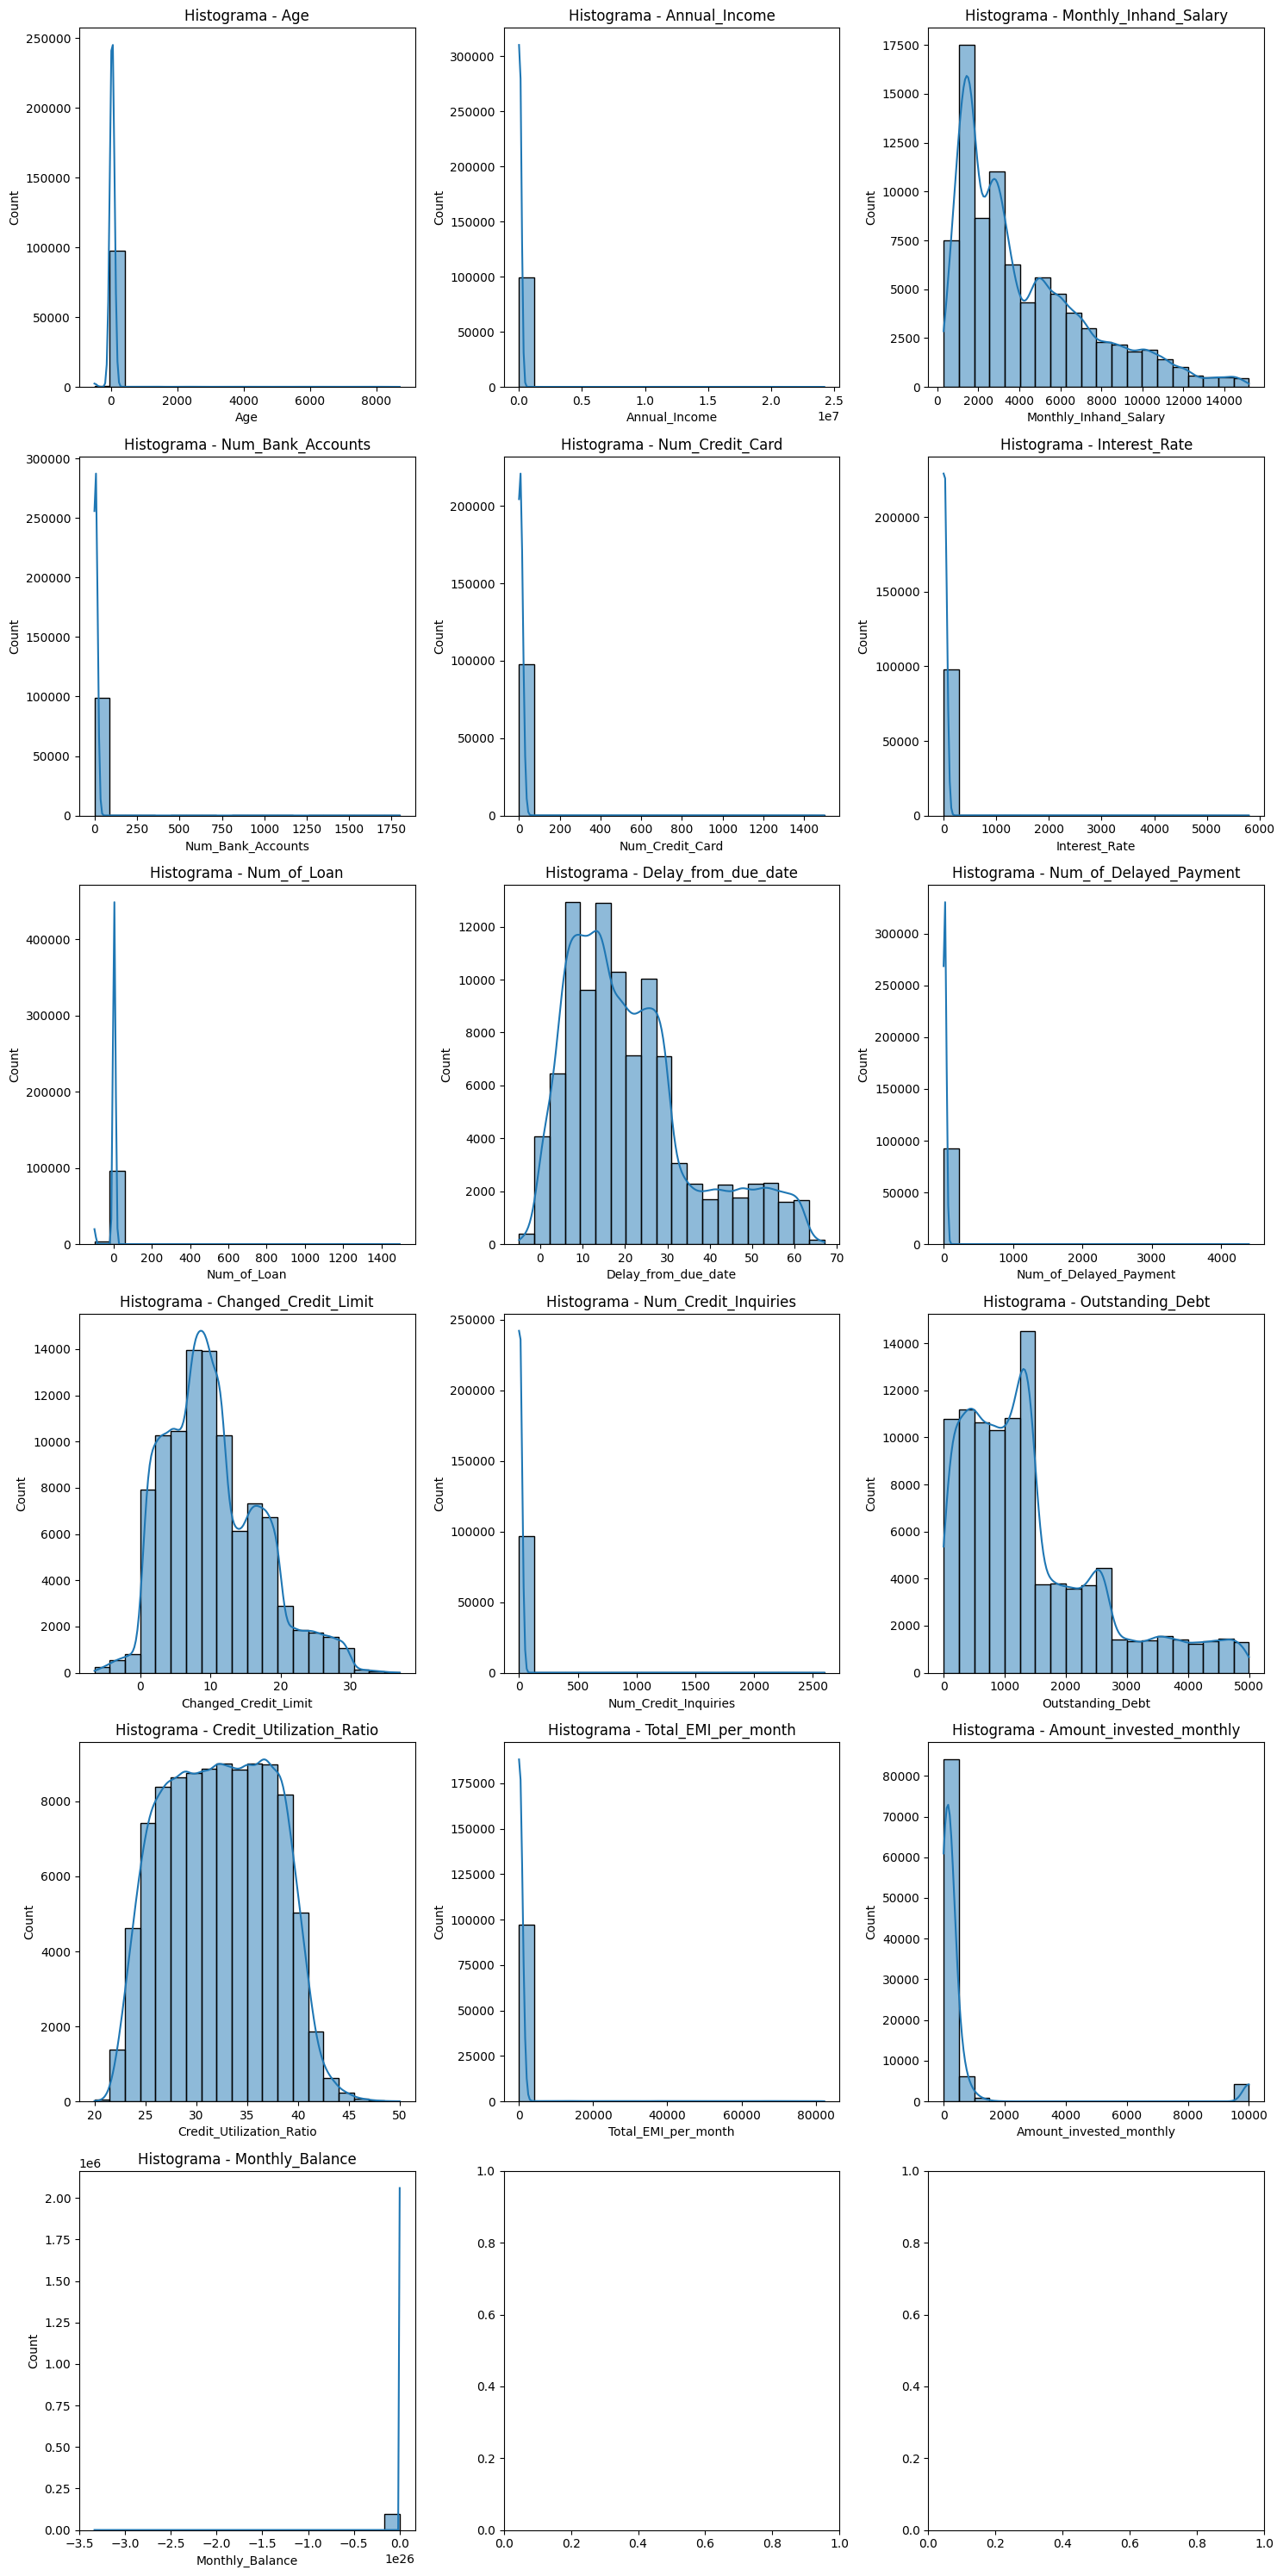

In [17]:
linhas = 6
colunas = 3

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

for i, coluna in enumerate(colunas_num):
    sns.histplot(data=df_credito, x=df_credito[coluna], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histograma - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

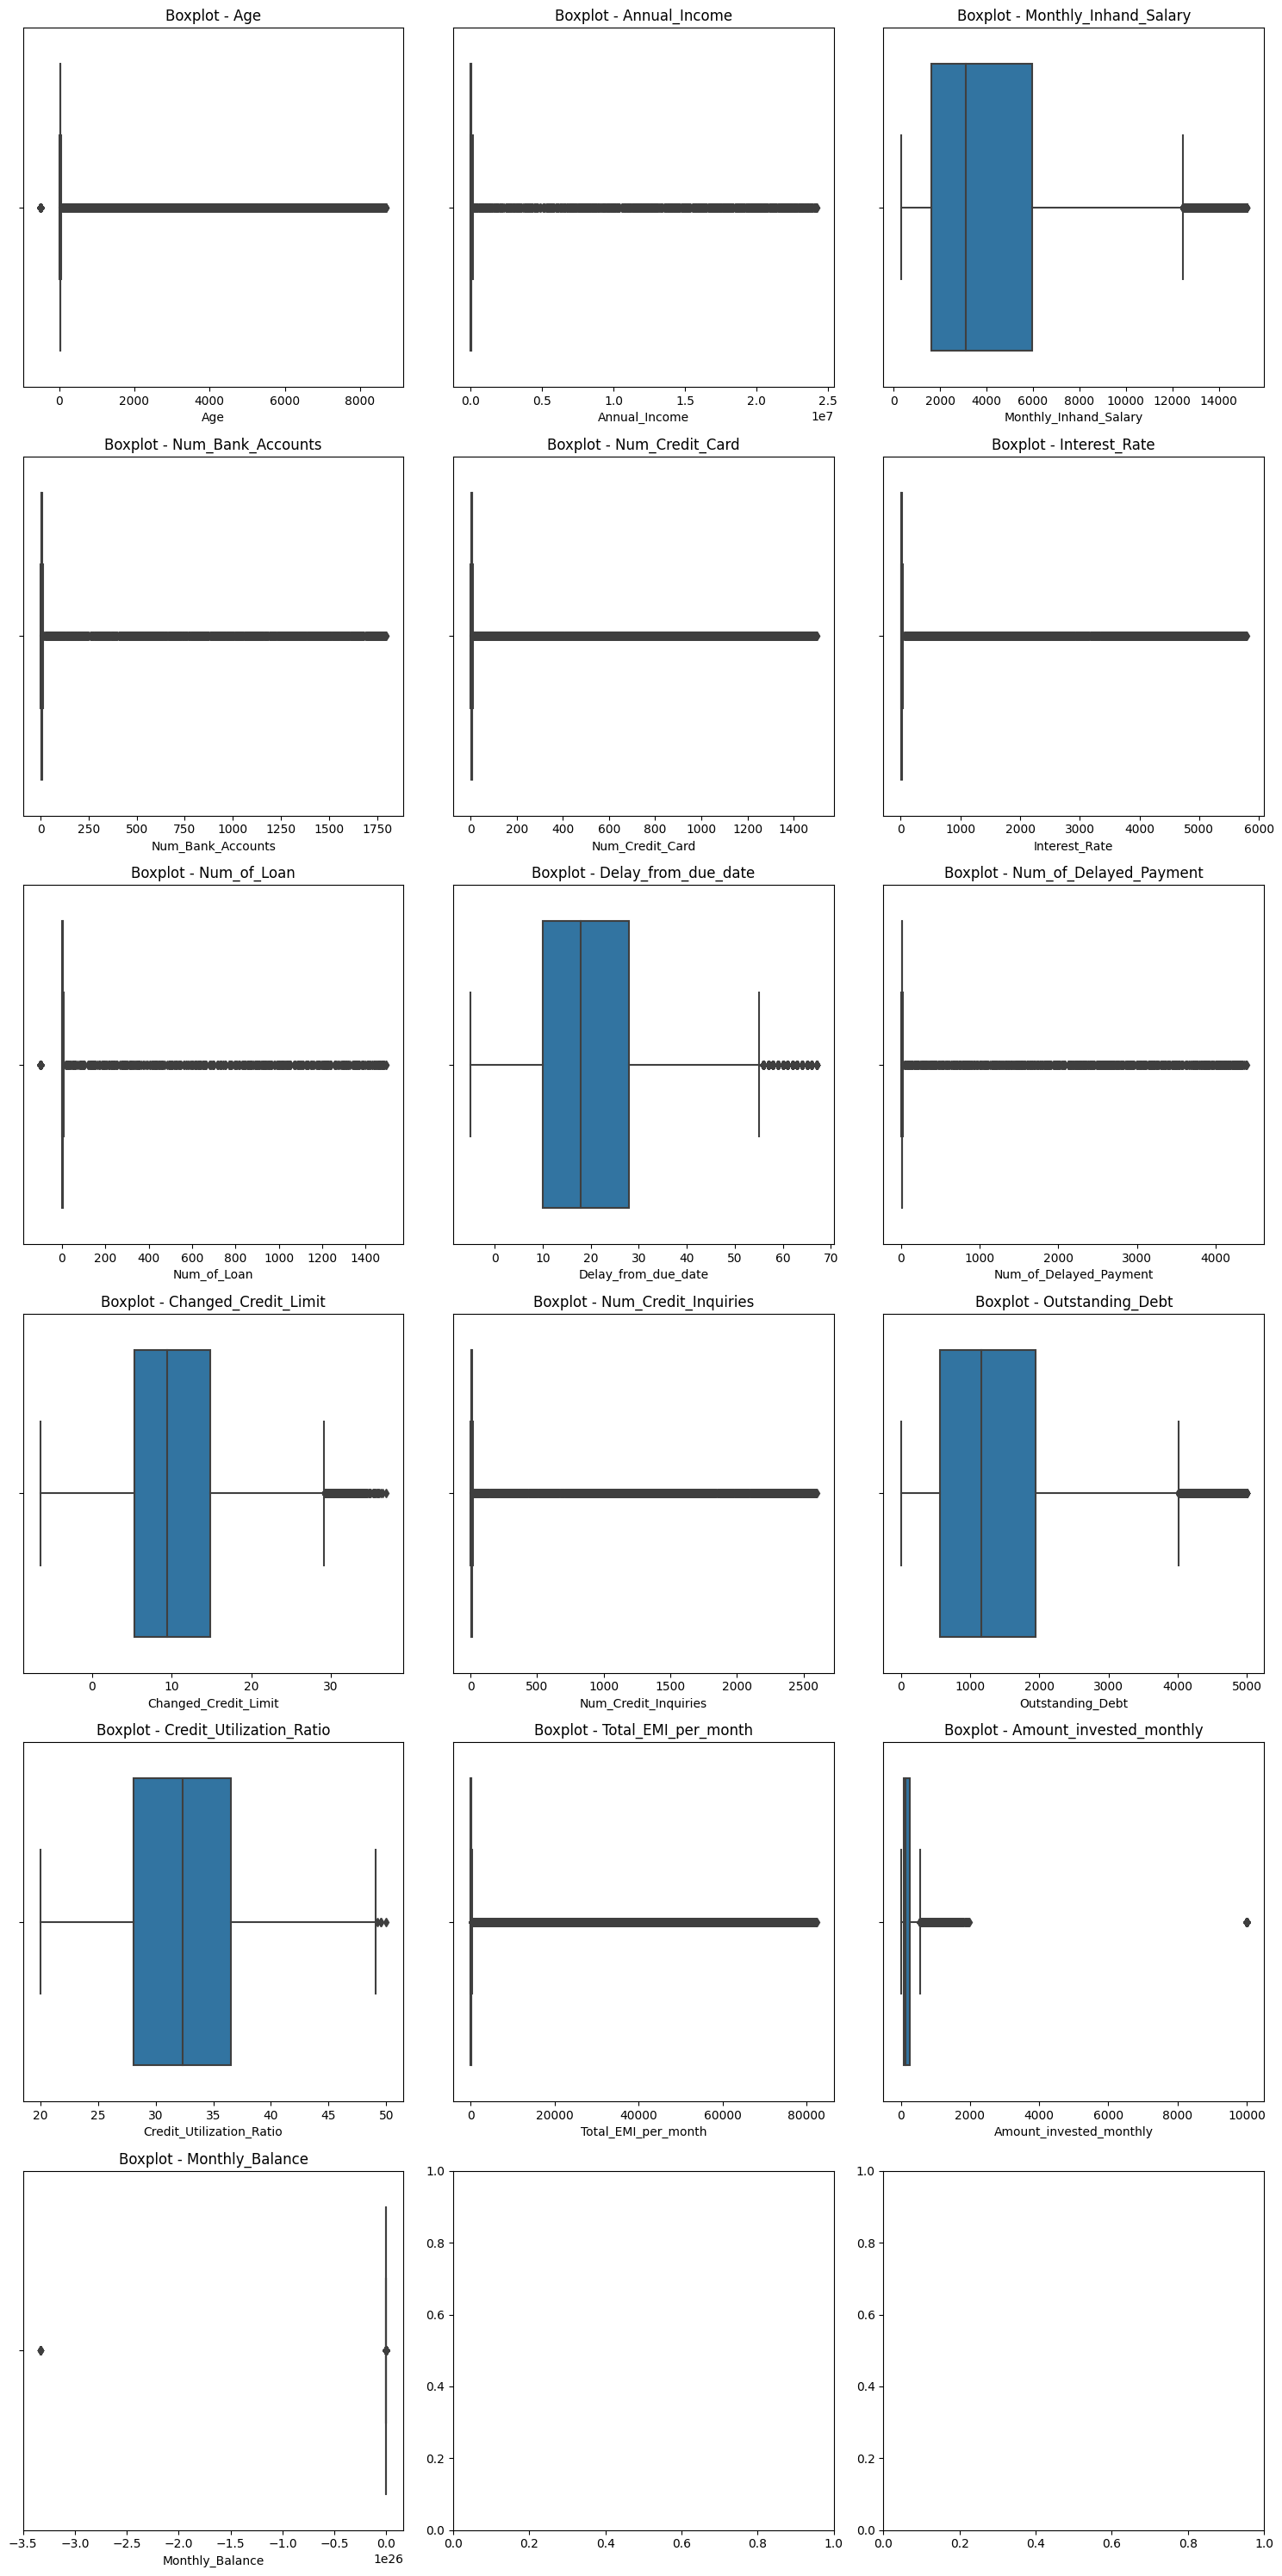

In [18]:
linhas = 6
colunas = 3

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar Boxplot
for i, coluna in enumerate(colunas_num):
    sns.boxplot(data=df_credito, x=df_credito[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Tratamentos

In [19]:
df_credito['Age'] = delimitar_valores(df_credito['Age'],0,120)
df_credito['Num_Bank_Accounts'] = limpar_valores_negativos(df_credito['Num_Bank_Accounts'])
df_credito['Num_of_Loan'] = limpar_valores_negativos(df_credito['Num_of_Loan'])
df_credito['Monthly_Balance'] = limpar_valores_negativos(df_credito['Monthly_Balance'])

In [20]:
df_credito.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,97230.00,33.33,10.80,14.00,24.00,33.00,42.00,118.00
Annual_Income,100000.00,176415.70,1429618.05,7005.93,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,84998.00,4194.17,3183.69,303.65,1625.57,3093.75,5957.45,15204.63
Num_Bank_Accounts,99979.00,17.10,117.42,0.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Num_of_Loan,96124.00,7.16,60.31,0.00,2.00,3.00,5.00,1496.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,92998.00,30.92,226.03,-3.00,9.00,14.00,18.00,4397.00
Changed_Credit_Limit,97909.00,10.39,6.79,-6.49,5.32,9.40,14.87,36.97


#### Dados Categóricos

##### Separa 'Type_of_Loan'

In [21]:
# Retirar os "and" e tirar o espaço após a virgula
# Aplica o get_dummies com separador ","
# Concatena os dataframes e exclui a coluna original

df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].str.replace(' and ','')
df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].str.replace(', ',',')


df_cat = df_credito['Type_of_Loan'].str.get_dummies(sep=',')


df_credito = pd.concat([df_credito, df_cat], axis=1)
df_credito = df_credito.drop('Type_of_Loan', axis=1)

##### Credit_Score

> Transforma o target **Credit_Score** em classe binária, visto que, ocorria erro durante a avaliação de desempenho do modelo:<br><br>
*ValueError: Expected 'estimator' to be a binary classifier. Got 3 classes instead.*<br>
**Credit_Score**, até então, era multiclasse:
<br><br>
*'Credit_Score': ['Good', 'Standard', 'Poor']*
*Categories (3, object): ['Good', 'Poor', 'Standard']*


In [22]:
df_credito['Credit_Score'] = df_credito['Credit_Score'].str.replace('Standard','Good')
df_credito['Credit_Score'].unique()

array(['Good', 'Poor'], dtype=object)

##### Credit_History_Age - Converter em número de anos

In [23]:
def converter_para_anos(valor):
    try:
       
        valor_str = str(valor)
        
        match = re.match(r'(\d+) Years and (\d+) Months', valor_str)
        
        if match:
            anos = int(match.group(1))
            meses = int(match.group(2))
            total_em_anos = anos + meses / 12
            return round(total_em_anos, 2)
        else:
            return None
    except:
        return None


df_credito['Credit_History_Age'] = df_credito['Credit_History_Age'].apply(converter_para_anos).astype(float)

   

In [24]:
df_credito['Credit_History_Age']
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       97230 non-null   float64 
 1   Occupation                92938 non-null   category
 2   Annual_Income             100000 non-null  float64 
 3   Monthly_Inhand_Salary     84998 non-null   float64 
 4   Num_Bank_Accounts         99979 non-null   float64 
 5   Num_Credit_Card           100000 non-null  int64   
 6   Interest_Rate             100000 non-null  int64   
 7   Num_of_Loan               96124 non-null   float64 
 8   Delay_from_due_date       100000 non-null  int64   
 9   Num_of_Delayed_Payment    92998 non-null   float64 
 10  Changed_Credit_Limit      97909 non-null   float64 
 11  Num_Credit_Inquiries      98035 non-null   float64 
 12  Credit_Mix                79805 non-null   category
 13  Outstanding_Debt          1000

In [25]:
df_credito.describe(include='all')

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
count,97230.00,92938,100000.00,84998.00,99979.00,100000.00,100000.00,96124.00,100000.00,92998.00,...,100000,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
unique,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.33,NaN,176415.70,4194.17,17.10,22.47,72.47,7.16,21.07,30.92,...,NaN,0.31,0.32,0.31,0.31,0.31,0.32,0.32,0.31,0.31
std,10.80,NaN,1429618.05,3183.69,117.42,129.06,466.42,60.31,14.86,226.03,...,NaN,0.46,0.47,0.46,0.46,0.46,0.47,0.47,0.46,0.46
min,14.00,NaN,7005.93,303.65,0.00,0.00,1.00,0.00,-5.00,-3.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.00,NaN,19457.50,1625.57,3.00,4.00,8.00,2.00,10.00,9.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,33.00,NaN,37578.61,3093.75,6.00,5.00,13.00,3.00,18.00,14.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,42.00,NaN,72790.92,5957.45,7.00,7.00,20.00,5.00,28.00,18.00,...,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Visualização dos Modelos

##### Função para visualização de desempenho dos modelos de classificação

In [26]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    print("\nMétricas de avaliação de treino:")
    y_pred_train = estimator.predict(X_train)
    cm_train     = confusion_matrix(y_train, y_pred_train)
    ConfusionMatrixDisplay(cm_train).plot(cmap='viridis')
    RocCurveDisplay.from_estimator(estimator, X_train, y_train)
    print(classification_report(y_train, y_pred_train))
    plt.show()

    print("\n-------------------------------")
    print("\nMétricas de avaliação de teste:")
    y_pred_test = estimator.predict(X_test)
    cm_test     = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm_test).plot(cmap='viridis')
    RocCurveDisplay.from_estimator(estimator, X_test, y_test)
    print(classification_report(y_test, y_pred_test))
    plt.show()

##### Particionando os dados de treino e teste

In [27]:
# Pega uma amostra de 3.000 registros, visto que com mais registros, o SVM demora MUITO para executar o modelo
df_credito = df_credito.sample(3000)

X = df_credito.drop(columns="Credit_Score")
y = df_credito["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Transformação das colunas numéricas

In [28]:
features_num          = X_train.select_dtypes(include=np.number).columns.tolist()
num_imputer           = SimpleImputer(strategy="mean")
X_train[features_num] = num_imputer.fit_transform(X_train[features_num])
scaler                = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])

##### Transformação das colunas categóricas

In [29]:
features_cat          = X_train.select_dtypes(exclude=np.number).columns.tolist()
cat_imputer           = SimpleImputer(strategy="constant", fill_value="unknown")
X_train[features_cat] = cat_imputer.fit_transform(X_train[features_cat])
encoder               = OneHotEncoder()

##### Combinando features numéricas e categóricas após a transformação usando np.hstack

In [30]:
X_train_cat_encoded  = encoder.fit_transform(X_train[features_cat])
X_train_preprocessed = np.hstack((X_train[features_num], X_train_cat_encoded.toarray()))

##### Pré-processamento dos dados de teste

In [31]:
X_test[features_num] = num_imputer.transform(X_test[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])
X_test[features_cat] = cat_imputer.transform(X_test[features_cat])
X_test_cat_encoded   = encoder.transform(X_test[features_cat])

##### Combinando features numéricas e categóricas após a transformação usando np.hstack

In [32]:
X_test_preprocessed = np.hstack((X_test[features_num], X_test_cat_encoded.toarray()))

### SVM (*Support Vector Machine*)

##### Treinando o modelo SVM

In [33]:
svm_model = SVC()

svm_model.fit(X_train_preprocessed, y_train)

SVC()

##### Avaliando o modelo com as métricas de classificação


Métricas de avaliação de treino:
              precision    recall  f1-score   support

        Good       0.86      0.95      0.90      1722
        Poor       0.83      0.59      0.69       678

    accuracy                           0.85      2400
   macro avg       0.84      0.77      0.80      2400
weighted avg       0.85      0.85      0.84      2400



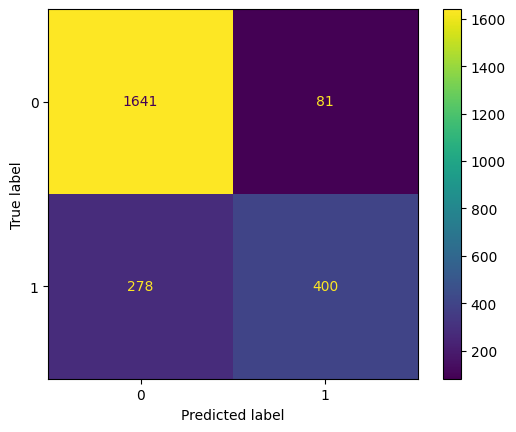

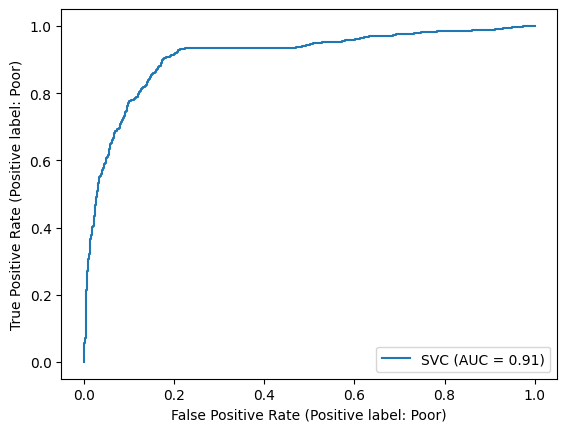


-------------------------------

Métricas de avaliação de teste:
              precision    recall  f1-score   support

        Good       0.81      0.94      0.87       430
        Poor       0.76      0.46      0.57       170

    accuracy                           0.81       600
   macro avg       0.79      0.70      0.72       600
weighted avg       0.80      0.81      0.79       600



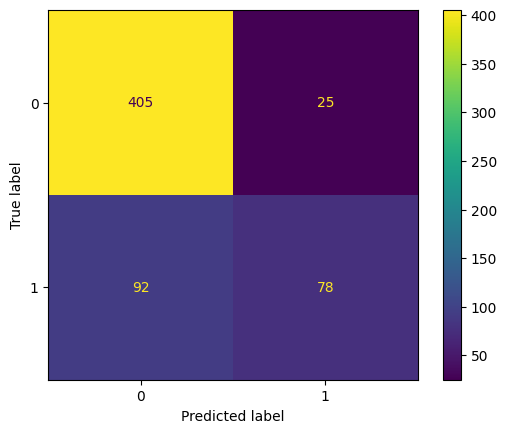

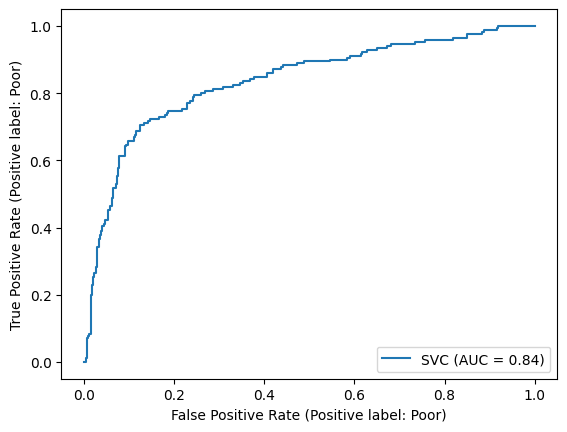

In [34]:
metricas_classificacao(svm_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

#### Hiperparâmetros:

`C`, `gamma` e `kernel`

##### Dicionário de combinações de hiperparâmetros

In [35]:
parametros = {
              "kernel": ["linear", "rbf", "poly"],
              "C"     : np.logspace(-2, 2, 5),
              "gamma" : np.logspace(-2, 2, 5)
             }

##### GridSearchCV

In [36]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_svc = GridSearchCV(estimator  = SVC(random_state = 42),
                        param_grid = parametros,
                        scoring    = "f1_weighted",
                        cv         = splitter,
                        verbose    = 10)

In [37]:
grid_svc.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5; 1/75] START C=0.01, gamma=0.01, kernel=linear..........................
[CV 1/5; 1/75] END C=0.01, gamma=0.01, kernel=linear;, score=0.724 total time=   0.0s
[CV 2/5; 1/75] START C=0.01, gamma=0.01, kernel=linear..........................
[CV 2/5; 1/75] END C=0.01, gamma=0.01, kernel=linear;, score=0.779 total time=   0.0s
[CV 3/5; 1/75] START C=0.01, gamma=0.01, kernel=linear..........................
[CV 3/5; 1/75] END C=0.01, gamma=0.01, kernel=linear;, score=0.741 total time=   0.0s
[CV 4/5; 1/75] START C=0.01, gamma=0.01, kernel=linear..........................
[CV 4/5; 1/75] END C=0.01, gamma=0.01, kernel=linear;, score=0.739 total time=   0.0s
[CV 5/5; 1/75] START C=0.01, gamma=0.01, kernel=linear..........................
[CV 5/5; 1/75] END C=0.01, gamma=0.01, kernel=linear;, score=0.752 total time=   0.0s
[CV 1/5; 2/75] START C=0.01, gamma=0.01, kernel=rbf.............................
[CV 1/5; 2/75] END C=0

In [39]:
best_params = grid_svc.best_params_
best_model  = grid_svc.best_estimator_

svm_model.fit(X_train_preprocessed, y_train)

SVC()

In [40]:
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}



Métricas de avaliação de treino:
              precision    recall  f1-score   support

        Good       0.87      0.92      0.89      1684
        Poor       0.78      0.68      0.73       716

    accuracy                           0.85      2400
   macro avg       0.82      0.80      0.81      2400
weighted avg       0.84      0.85      0.84      2400



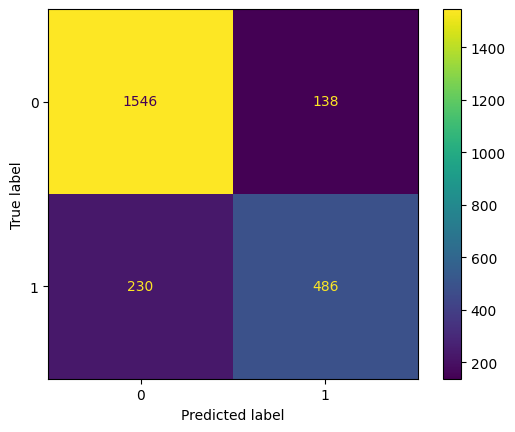

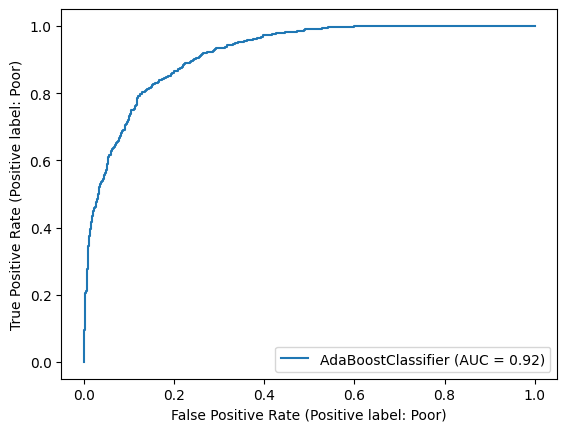


-------------------------------

Métricas de avaliação de teste:
              precision    recall  f1-score   support

        Good       0.82      0.89      0.85       421
        Poor       0.67      0.53      0.59       179

    accuracy                           0.78       600
   macro avg       0.74      0.71      0.72       600
weighted avg       0.77      0.78      0.77       600



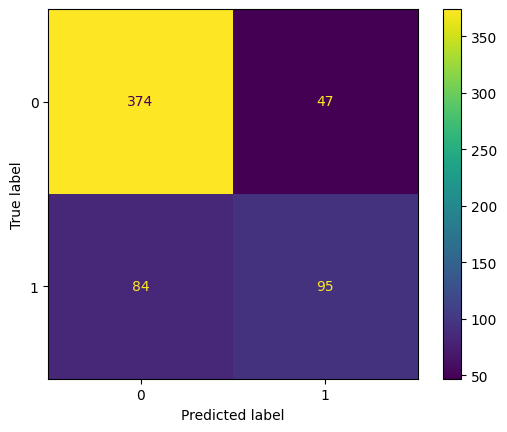

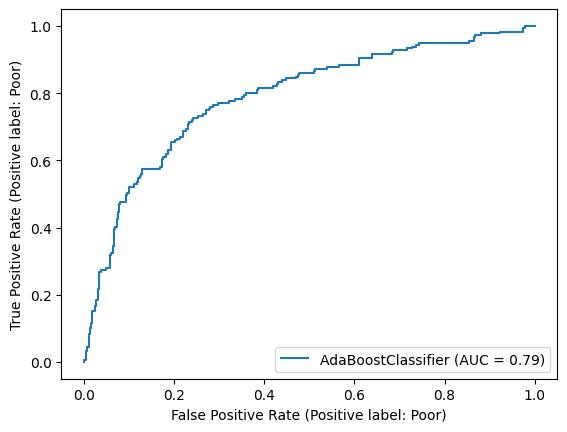

In [98]:
metricas_classificacao(best_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

### AdaBoost Classifier

##### Treinando o modelo

In [42]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_preprocessed, y_train)

AdaBoostClassifier()

##### Avaliando do modelo com as métricas de classificação


Métricas de avaliação de treino:
              precision    recall  f1-score   support

        Good       0.87      0.92      0.89      1684
        Poor       0.78      0.68      0.73       716

    accuracy                           0.85      2400
   macro avg       0.82      0.80      0.81      2400
weighted avg       0.84      0.85      0.84      2400



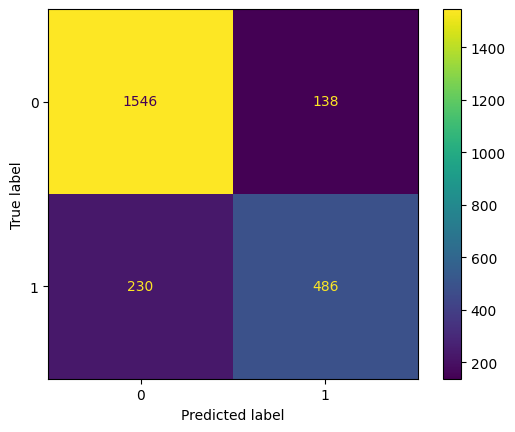

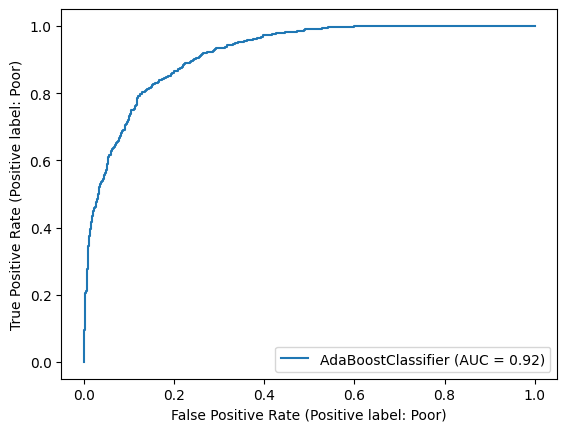


-------------------------------

Métricas de avaliação de teste:
              precision    recall  f1-score   support

        Good       0.82      0.89      0.85       421
        Poor       0.67      0.53      0.59       179

    accuracy                           0.78       600
   macro avg       0.74      0.71      0.72       600
weighted avg       0.77      0.78      0.77       600



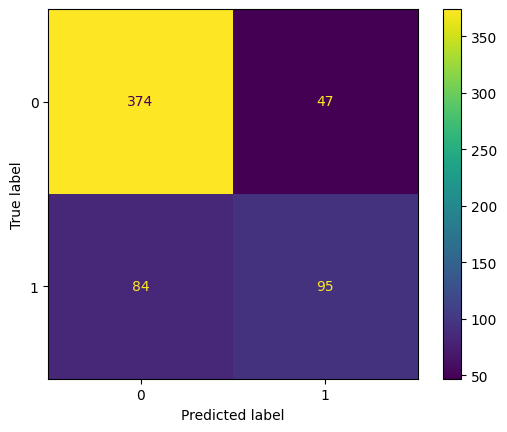

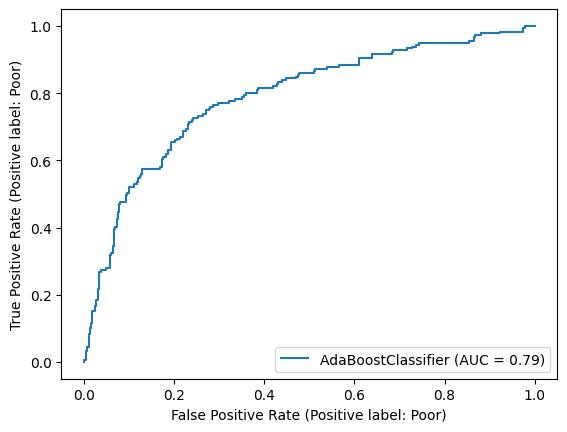

In [99]:
metricas_classificacao(adaboost_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

#### Hiperparâmetros:

`n_estimators`

##### Dicionário de combinações de hiperparâmetros

In [44]:
parametros = {
              "n_estimators": [150, 165, 200],
              "random_state": [30, 42, 70, 100]
             }

##### GridSearchCV

In [45]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_ada = GridSearchCV(estimator  = AdaBoostClassifier(random_state = 42),
                        param_grid = parametros,
                        scoring    = "f1_weighted",
                        cv         = splitter,
                        verbose    = 10)

grid_ada.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START n_estimators=150, random_state=30..........................
[CV 1/5; 1/12] END n_estimators=150, random_state=30;, score=0.758 total time=   1.0s
[CV 2/5; 1/12] START n_estimators=150, random_state=30..........................
[CV 2/5; 1/12] END n_estimators=150, random_state=30;, score=0.796 total time=   1.0s
[CV 3/5; 1/12] START n_estimators=150, random_state=30..........................
[CV 3/5; 1/12] END n_estimators=150, random_state=30;, score=0.795 total time=   1.0s
[CV 4/5; 1/12] START n_estimators=150, random_state=30..........................
[CV 4/5; 1/12] END n_estimators=150, random_state=30;, score=0.779 total time=   1.0s
[CV 5/5; 1/12] START n_estimators=150, random_state=30..........................
[CV 5/5; 1/12] END n_estimators=150, random_state=30;, score=0.773 total time=   1.0s
[CV 1/5; 2/12] START n_estimators=150, random_state=42..........................
[CV 1/5; 2/12] END n_es

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(random_state=42),
             param_grid={'n_estimators': [150, 165, 200],
                         'random_state': [30, 42, 70, 100]},
             scoring='f1_weighted', verbose=10)

In [54]:
best_params = grid_ada.best_params_
best_model  = grid_ada.best_estimator_

adaboost_model.fit(X_train_preprocessed, y_train)

AdaBoostClassifier()

In [100]:
print("Melhores hiperparâmetros:", best_params)
print("Melhores hiperparâmetros:", best_model)

Melhores hiperparâmetros: {'n_estimators': 165, 'random_state': 30}
Melhores hiperparâmetros: AdaBoostClassifier(n_estimators=165, random_state=30)



Métricas de avaliação de treino:
              precision    recall  f1-score   support

        Good       0.87      0.92      0.89      1684
        Poor       0.78      0.68      0.73       716

    accuracy                           0.85      2400
   macro avg       0.82      0.80      0.81      2400
weighted avg       0.84      0.85      0.84      2400



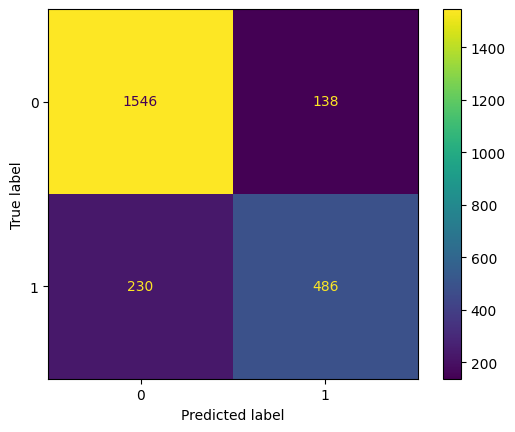

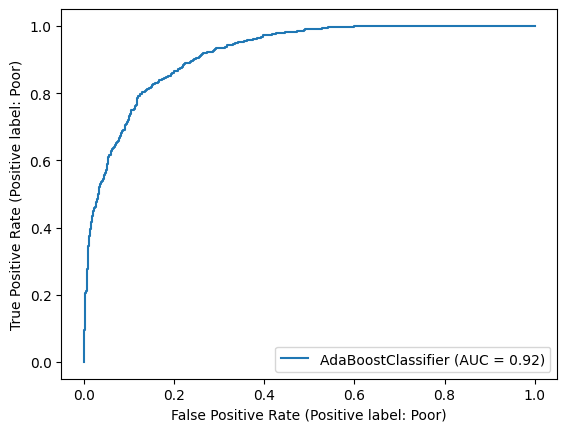


-------------------------------

Métricas de avaliação de teste:
              precision    recall  f1-score   support

        Good       0.82      0.89      0.85       421
        Poor       0.67      0.53      0.59       179

    accuracy                           0.78       600
   macro avg       0.74      0.71      0.72       600
weighted avg       0.77      0.78      0.77       600



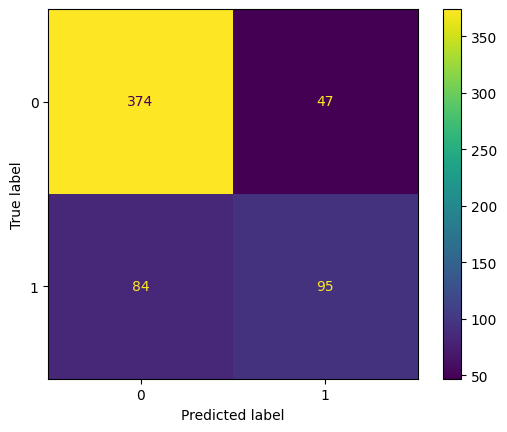

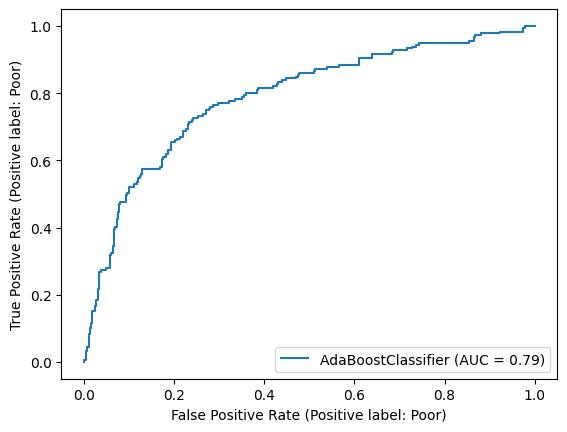

In [101]:
metricas_classificacao(best_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

# Aprendizado Não Supervisionado

## Descrição do problema e explanação dos dados

#### Extrair padrões dos dados do comportamento e hábitos de compra do consumidor, entender suas estruturas e fazer recomendações

1. ID do Cliente: Um identificador exclusivo atribuído a cada cliente individual, facilitando o rastreamento e a análise de seu comportamento de compra ao longo do tempo.
1. Idade: A idade do cliente, fornecendo informações demográficas para segmentação e estratégias de marketing direcionadas.
1. Género: A identificação do género do cliente, uma variável demográfica chave que influencia as preferências de produto e os padrões de compra.
1. Item comprado: O produto ou item específico selecionado pelo cliente durante a transação.
1. Categoria: A classificação ampla ou grupo ao qual pertence o item comprado (por exemplo, roupas, eletrônicos, mantimentos).
1. Valor da compra (USD): O valor monetário da transação, indicado em dólares dos Estados Unidos (USD), indica o custo do(s) item(s) adquirido(s).
1. Localização: A localização geográfica onde a compra foi feita, oferecendo insights sobre preferências regionais e tendências de mercado.
1. Tamanho: A especificação de tamanho (se aplicável) do item adquirido, relevante para vestuário, calçados e determinados bens de consumo.
1. Cor: A variante ou escolha de cor associada ao item adquirido, influenciando as preferências do cliente e a disponibilidade do produto.
1. Estação: A relevância sazonal do item comprado (por exemplo, primavera, verão, outono, inverno), impactando a gestão de estoque e as estratégias de marketing.
1. Avaliação: avaliação numérica ou qualitativa fornecida pelo cliente em relação à sua satisfação com o item adquirido.
1. Status da Assinatura : Indica se o cliente optou por um serviço de assinatura, oferecendo insights sobre seu nível de fidelidade e potencial de receita recorrente.
1. Tipo de Envio: Especifica o método utilizado para entregar o item adquirido (por exemplo, envio padrão, entrega expressa), influenciando os prazos e custos de entrega.
1. Desconto aplicado: indica se algum desconto promocional foi aplicado à compra, esclarecendo a sensibilidade ao preço e a eficácia da promoção.
1. Código promocional utilizado: indica se um código promocional ou cupom foi utilizado durante a transação, auxiliando na avaliação do sucesso da campanha de marketing.
1. Compras Anteriores: Fornece informações sobre a quantidade ou frequência de compras anteriores realizadas pelo cliente, contribuindo para estratégias de segmentação e retenção de clientes.
1. Método de pagamento: especifica o modo de pagamento utilizado pelo cliente (por exemplo, cartão de crédito, dinheiro), oferecendo informações sobre as opções de pagamento preferidas.
1. Frequência de compras: indica a frequência com que o cliente se envolve em atividades de compra, uma métrica crítica para avaliar a fidelidade do cliente e o valor vitalício.

## Análise de Dados Exploratória (*EDA*)

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


##### Carregando o conjunto de dados

In [ ]:
df_consumo = pd.read_csv('n_supervisionado/dataset/shopping_behavior_updated.csv')
df_consumo.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

##### Excluir colunas relacionadas registros únicos

In [ ]:
df_consumo = df_consumo.drop('Customer ID', axis=1)

##### Teste - Diminuir a quantidade de estados utilizando as divisões regionais para facilitar a análise dos cluster - 50 estados para 9 divisoes - O resultado final da métrica piora um pouco, mas para nós, a visualização dos clusters ficou melhor

In [ ]:
df_state = pd.read_csv('n_supervisionado/dataset/state_usa.csv',sep=";")

In [ ]:
df_state.head()

,State,Division
0,Alabama,East South Central
1,Alaska,Pacific
2,Arizona,Mountain
3,Arkansas,West South Central
4,California,Pacific


In [ ]:
df_consumo = pd.merge(df_consumo,df_state, left_on='Location', right_on='State')
df_consumo = df_consumo.drop(['Location','State'], axis=1)

In [ ]:
df_consumo

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Division
0,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,East South Central
1,56,Male,Shorts,Clothing,56,L,Cyan,Summer,5.0,Yes,Next Day Air,Yes,Yes,7,Bank Transfer,Every 3 Months,East South Central
2,39,Male,Hat,Accessories,53,S,Silver,Summer,4.6,Yes,Free Shipping,Yes,Yes,45,PayPal,Weekly,East South Central
3,50,Male,Sweater,Clothing,45,L,Orange,Fall,4.8,Yes,2-Day Shipping,Yes,Yes,27,Cash,Bi-Weekly,East South Central
4,44,Male,Scarf,Accessories,39,L,Violet,Fall,3.7,Yes,Next Day Air,Yes,Yes,13,PayPal,Fortnightly,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,30,Female,Sandals,Footwear,83,S,Teal,Fall,2.9,No,Standard,No,No,23,PayPal,Every 3 Months,East North Central
3896,38,Female,Blouse,Clothing,39,L,Peach,Spring,2.9,No,Next Day Air,No,No,36,PayPal,Annually,East North Central
3897,50,Female,Skirt,Clothing,75,M,Pink,Spring,2.8,No,Next Day Air,No,No,7,Bank Transfer,Every 3 Months,East North Central
3898,45,Female,Dress,Clothing,95,M,Orange,Winter,4.2,No,Free Shipping,No,No,26,Bank Transfer,Every 3 Months,East North Central


##### Quantidade de valores únicos por coluna e os valores

In [ ]:
for column in df_consumo.columns:
    unique_counts = df_consumo[column].nunique()
    print(f"'{column}' tem {unique_counts} valores únicos")
    unique_values = df_consumo[column].unique()
    if unique_counts > 30:
        print(unique_values[:30])
        print(f"({unique_counts - 30} valores adicionais não exibidos)")
    else:
        print(unique_values)
    print() 

'Age' tem 53 valores únicos
[55 56 39 50 44 42 25 29 64 38 28 54 47 41 37 49 69 33 51 43 58 32 67 68
 70 26 65 36 18 46]
(23 valores adicionais não exibidos)

'Gender' tem 2 valores únicos
['Male' 'Female']

'Item Purchased' tem 25 valores únicos
['Blouse' 'Shorts' 'Hat' 'Sweater' 'Scarf' 'Handbag' 'Jewelry' 'Coat'
 'Shirt' 'Jacket' 'Backpack' 'Dress' 'Boots' 'Jeans' 'Pants' 'Gloves'
 'Belt' 'Skirt' 'Socks' 'Shoes' 'Sandals' 'Sunglasses' 'T-shirt'
 'Sneakers' 'Hoodie']

'Category' tem 4 valores únicos
['Clothing' 'Accessories' 'Outerwear' 'Footwear']

'Purchase Amount (USD)' tem 81 valores únicos
[ 53  56  45  39  60 100  36  68  40  67  76  37  21  50  29  72  59  44
  55  30  89  41  52  64  57  61  43  49  75  84]
(51 valores adicionais não exibidos)

'Size' tem 4 valores únicos
['L' 'S' 'M' 'XL']

'Color' tem 25 valores únicos
['Gray' 'Cyan' 'Silver' 'Orange' 'Violet' 'Yellow' 'Olive' 'Charcoal'
 'Beige' 'Gold' 'Pink' 'Brown' 'Blue' 'Lavender' 'Red' 'Black' 'Green'
 'Maroon' 'Teal'

*Sem valores nulos e sem valores "estranhos"*. 
*Como é uma análise de tendencia vamos considerar todas as colunas e dados.*

In [ ]:
colunas = df_consumo.select_dtypes(exclude='number').columns
for col in colunas:
    value_counts = df_consumo[col].value_counts(1)
    print(f"Coluna: {col}")
    print(value_counts)
    print()

Coluna: Gender
Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

Coluna: Item Purchased
Item Purchased
Blouse        0.043846
Jewelry       0.043846
Pants         0.043846
Shirt         0.043333
Dress         0.042564
Sweater       0.042051
Jacket        0.041795
Coat          0.041282
Sunglasses    0.041282
Belt          0.041282
Sandals       0.041026
Socks         0.040769
Skirt         0.040513
Scarf         0.040256
Shorts        0.040256
Hat           0.039487
Handbag       0.039231
Hoodie        0.038718
Shoes         0.038462
T-shirt       0.037692
Sneakers      0.037179
Boots         0.036923
Backpack      0.036667
Gloves        0.035897
Jeans         0.031795
Name: proportion, dtype: float64

Coluna: Category
Category
Clothing       0.445385
Accessories    0.317949
Footwear       0.153590
Outerwear      0.083077
Name: proportion, dtype: float64

Coluna: Size
Size
M     0.45
L     0.27
S     0.17
XL    0.11
Name: proportion, dtype: float64

Coluna: Color
C

*As colunas Promo Code Used e  Discount Applied tem as mesmas informações quando houve desconto teve o uso do codigo promocional*

In [ ]:
df_consumo = df_consumo.drop('Promo Code Used', axis=1)

In [ ]:
df_consumo.describe().round(2)

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00
mean,44.07,59.76,3.75,25.35
std,15.21,23.69,0.72,14.45
min,18.00,20.00,2.50,1.00
25%,31.00,39.00,3.10,13.00
50%,44.00,60.00,3.70,25.00
75%,57.00,81.00,4.40,38.00
max,70.00,100.00,5.00,50.00


In [ ]:
df_consumo.describe(include='O')

,Gender,Item Purchased,Category,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Payment Method,Frequency of Purchases,Division
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,4,25,4,2,6,2,6,7,9
top,Male,Blouse,Clothing,M,Olive,Spring,No,Free Shipping,No,PayPal,Every 3 Months,Mountain
freq,2652,171,1737,1755,177,999,2847,675,2223,677,584,639


##### Distribuição dos dados- Identificação de Outliers

In [ ]:
colunas_num = df_consumo.select_dtypes(include='number')

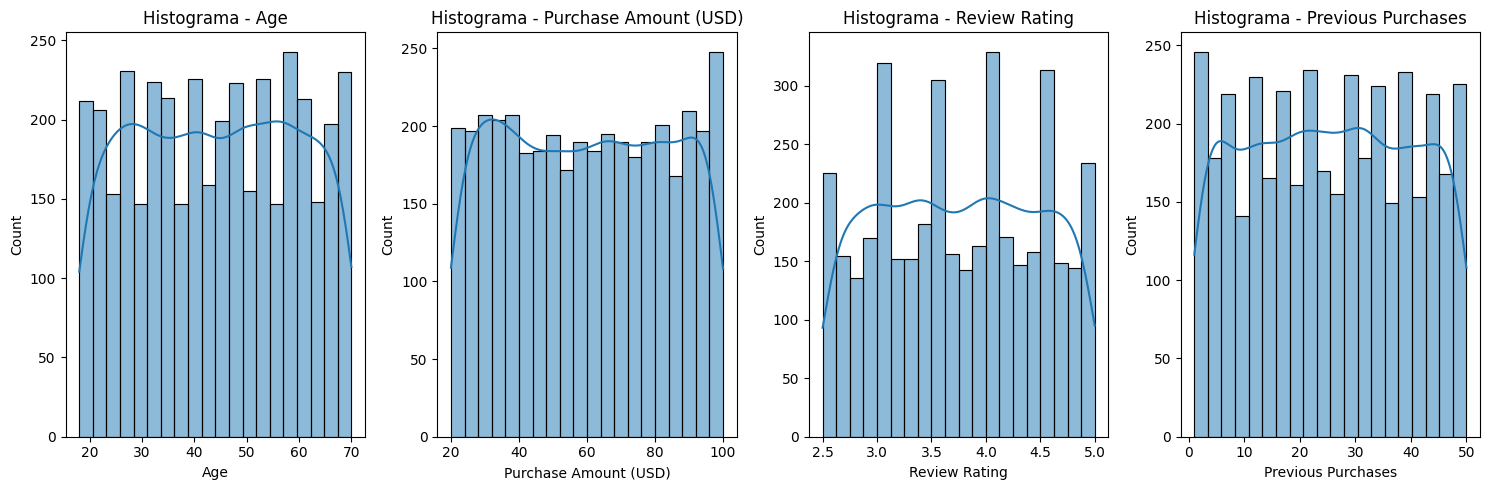

In [ ]:
linhas = 1      
colunas = 4
fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

for i, coluna in enumerate(colunas_num):
    sns.histplot(data=df_consumo, x=df_consumo[coluna], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histograma - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
for coluna in colunas_num:
    mediana = df_consumo[coluna].median()
    media = df_consumo[coluna].mean()
    print(f"Mediana de {coluna} = {mediana}")
    print(f"Media de {coluna} = {media.round(2)}")


Mediana de Age = 44.0
Media de Age = 44.07
Mediana de Purchase Amount (USD) = 60.0
Media de Purchase Amount (USD) = 59.76
Mediana de Review Rating = 3.7
Media de Review Rating = 3.75
Mediana de Previous Purchases = 25.0
Media de Previous Purchases = 25.35


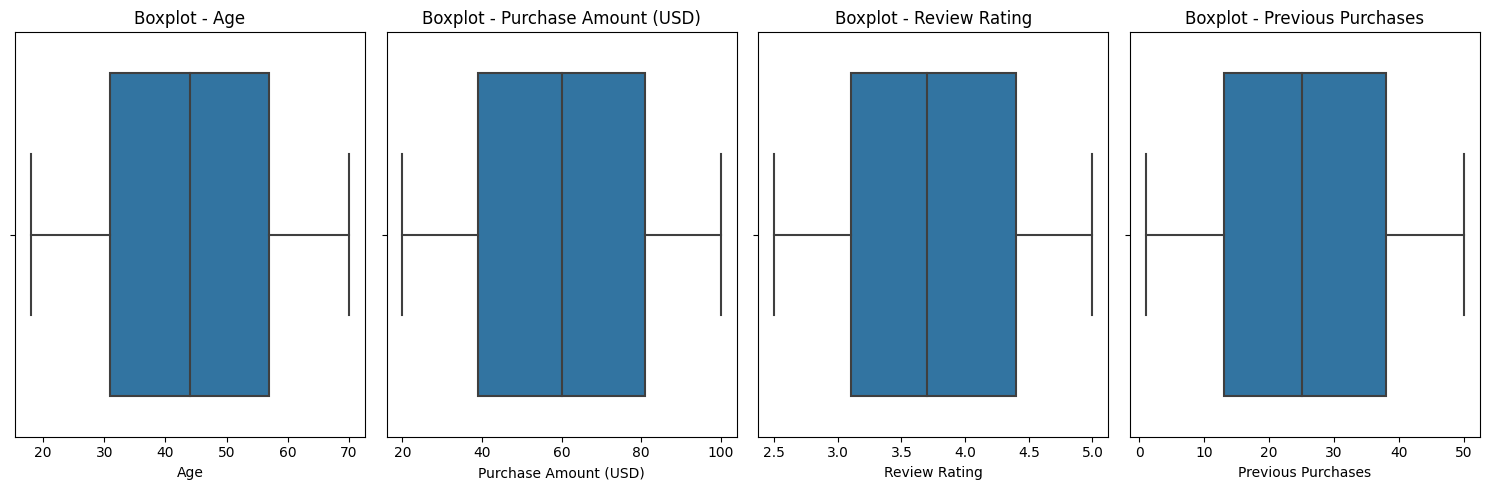

In [ ]:
linhas = 1
colunas = 4

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar Boxplot
for i, coluna in enumerate(colunas_num):
    sns.boxplot(data=df_consumo, x=df_consumo[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

*Notamos uma distribuição simétrica das variáveis numéricas onde a media e mediana estão bem próximas e sem outliers*

## Pre-processamento 

In [ ]:
colunas_numericas = df_consumo.select_dtypes(include='number').columns
colunas_categoricas = df_consumo.select_dtypes(include='O').columns

In [ ]:
df_consumo.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Division
0,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,East South Central
1,56,Male,Shorts,Clothing,56,L,Cyan,Summer,5.0,Yes,Next Day Air,Yes,7,Bank Transfer,Every 3 Months,East South Central
2,39,Male,Hat,Accessories,53,S,Silver,Summer,4.6,Yes,Free Shipping,Yes,45,PayPal,Weekly,East South Central
3,50,Male,Sweater,Clothing,45,L,Orange,Fall,4.8,Yes,2-Day Shipping,Yes,27,Cash,Bi-Weekly,East South Central
4,44,Male,Scarf,Accessories,39,L,Violet,Fall,3.7,Yes,Next Day Air,Yes,13,PayPal,Fortnightly,East South Central


In [ ]:
df_original = df_consumo.copy()

In [ ]:
le = LabelEncoder()
for coluna in colunas_categoricas:
      df_consumo[coluna] = le.fit_transform(df_consumo[coluna])

    
# Padronizar os dados (importante para o K-means)
scaler = StandardScaler()
df_consumo[colunas_numericas] = scaler.fit_transform(df_consumo[colunas_numericas])   

X = df_consumo.values

In [ ]:
X

array([[ 0.71891344,  1.        ,  2.        , ...,  5.        ,
         3.        ,  1.        ],
       [ 0.78467851,  1.        , 18.        , ...,  0.        ,
         2.        ,  1.        ],
       [-0.33332775,  1.        ,  8.        , ...,  4.        ,
         6.        ,  1.        ],
       ...,
       [ 0.39008807,  0.        , 19.        , ...,  0.        ,
         2.        ,  0.        ],
       [ 0.0612627 ,  0.        ,  5.        , ...,  0.        ,
         2.        ,  0.        ],
       [-0.59638805,  0.        , 12.        , ...,  4.        ,
         3.        ,  0.        ]])

## K-Means

## Considerações

Observamos:

1. Para colunas numéricas não há muita diferença entre as médias entre clusters;
2. A maoir diferença está entre as informações de tipo de produto, categoria que está vinculada ao produto, a divisão que é o local da compra e cor que tem muita variação mas algumas cores não estão presentes em todos os clusters finais;
Por exemplo:

O cluster 0 tem mais foco na categoria clothings e zero foco na Outerwear, com um pouco mais de representatividade nos estados correspondentes a divisão South Atlantic;
O cluster 1 tem mais foco na categoria acessorios representatividade nos estados correspondentes a divisão Montain;

Para maiores conclusões se faz necessário mais análises e testes.



*Observações*
*Para tentar melhorar a separação dos clusters,foram feitos vários testes com retirada de  algumas colunas como cor que tem uma grande variação, season por não ter muita variação %, item_Purchase por ter grande variação, porém não houve diferença significativa nos resultados*

##### Método Cotovelo (Elbow) para descobrir melhor valor de K

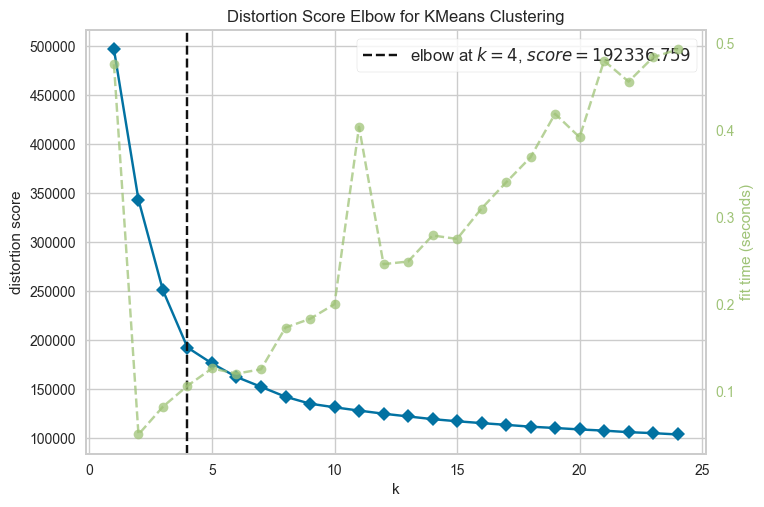

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Carrega o modelo Kmeans e a função KElbowVisualizer do Yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
 
# Instancia o modelo
model = KMeans(n_init=10)
 
# Instancia o visualizador
visualizer = KElbowVisualizer(model,       # o modelo K-means a ser utilizado
                              k = (1, 25)) # Faixa de valores para o K
 
# Fit do Visualizador
visualizer.fit(X)
 
# Mostra o gráfico
visualizer.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Função para aplicar o K-Means e calcular métricas
def apply_kmeans_and_metrics(X, n_clusters, tol, max_iter):
    kmeans = KMeans(n_clusters=n_clusters, tol=tol, max_iter=max_iter, n_init=10, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

    return silhouette, dunn_index, calinski_harabasz_index, y_pred



In [ ]:
# Testes com diferentes valores de clusters, tolerância e max_iter
n_clusters_values = [3, 4, 6]
tolerance_values = [1e-4, 1e-3, 1e-1]
max_iter_values = [50, 100, 200]

for n_clusters in n_clusters_values:
    for tol in tolerance_values:
        for max_iter in max_iter_values:
            print(f'\n--- Resultados para Clusters={n_clusters}, Tolerância={tol}, Max Iter={max_iter} ---')
            silhouette, dunn_index, calinski_harabasz_index,y_pred = apply_kmeans_and_metrics(X, n_clusters, tol, max_iter)
            print(f'Silhouette Coefficient: {silhouette:.4f}')
            print(f'Dunn Index: {dunn_index:.4f}')
            print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')


--- Resultados para Clusters=3, Tolerância=0.0001, Max Iter=50 ---


Silhouette Coefficient: 0.2748
Dunn Index: 1.1356
Calinski-Harabasz Index: 1914.1320

--- Resultados para Clusters=3, Tolerância=0.0001, Max Iter=100 ---
Silhouette Coefficient: 0.2748
Dunn Index: 1.1356
Calinski-Harabasz Index: 1914.1320

--- Resultados para Clusters=3, Tolerância=0.0001, Max Iter=200 ---
Silhouette Coefficient: 0.2748
Dunn Index: 1.1356
Calinski-Harabasz Index: 1914.1320

--- Resultados para Clusters=3, Tolerância=0.001, Max Iter=50 ---
Silhouette Coefficient: 0.2747
Dunn Index: 1.1346
Calinski-Harabasz Index: 1913.2872

--- Resultados para Clusters=3, Tolerância=0.001, Max Iter=100 ---
Silhouette Coefficient: 0.2747
Dunn Index: 1.1346
Calinski-Harabasz Index: 1913.2872

--- Resultados para Clusters=3, Tolerância=0.001, Max Iter=200 ---
Silhouette Coefficient: 0.2747
Dunn Index: 1.1346
Calinski-Harabasz Index: 1913.2872

--- Resultados para Clusters=3, Tolerância=0.1, Max Iter=50 ---
Silhouette Coefficient: 0.2738
Dunn Index: 1.1327
Calinski-Harabasz Index: 1907.4884

*O melhor resultado encontrado foi com 4 clusters, confirmando o método de cotovelo*

##### Melhor resultado - pelas métricas

In [ ]:
silhouette, dunn_index, calinski_harabasz_index,y_pred = apply_kmeans_and_metrics(X, 4, 0.0001, 50)
print(f'Silhouette Coefficient: {silhouette:.4f}')
print(f'Dunn Index: {dunn_index:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')

Silhouette Coefficient: 0.2752
Dunn Index: 1.1158
Calinski-Harabasz Index: 2052.7133


In [ ]:
df_kmeans = df_original.copy()

In [ ]:
df_kmeans['cluster'] = y_pred

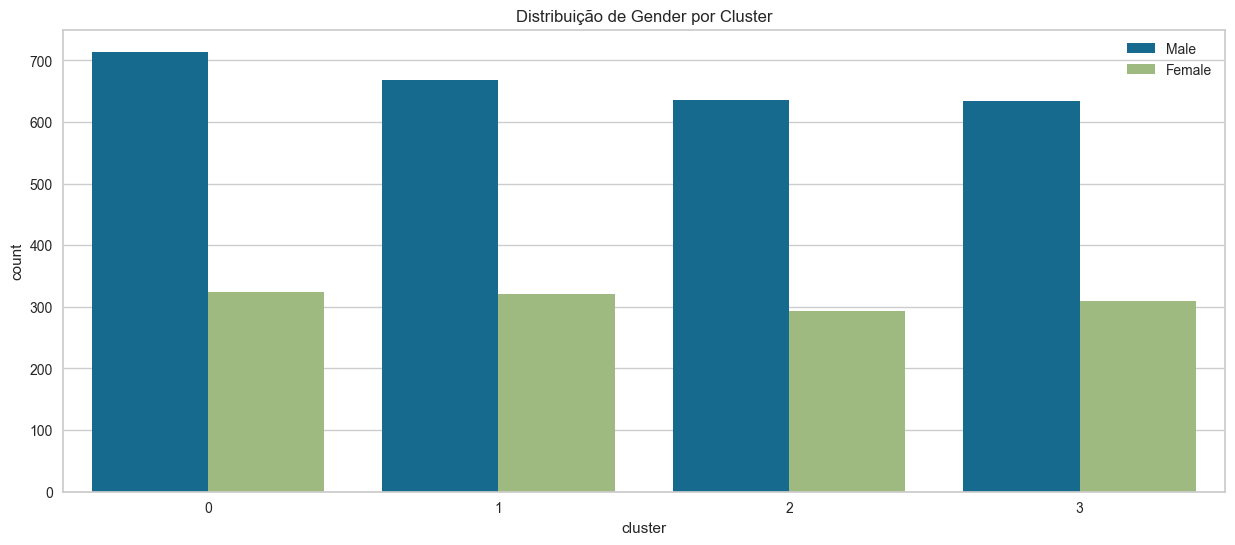

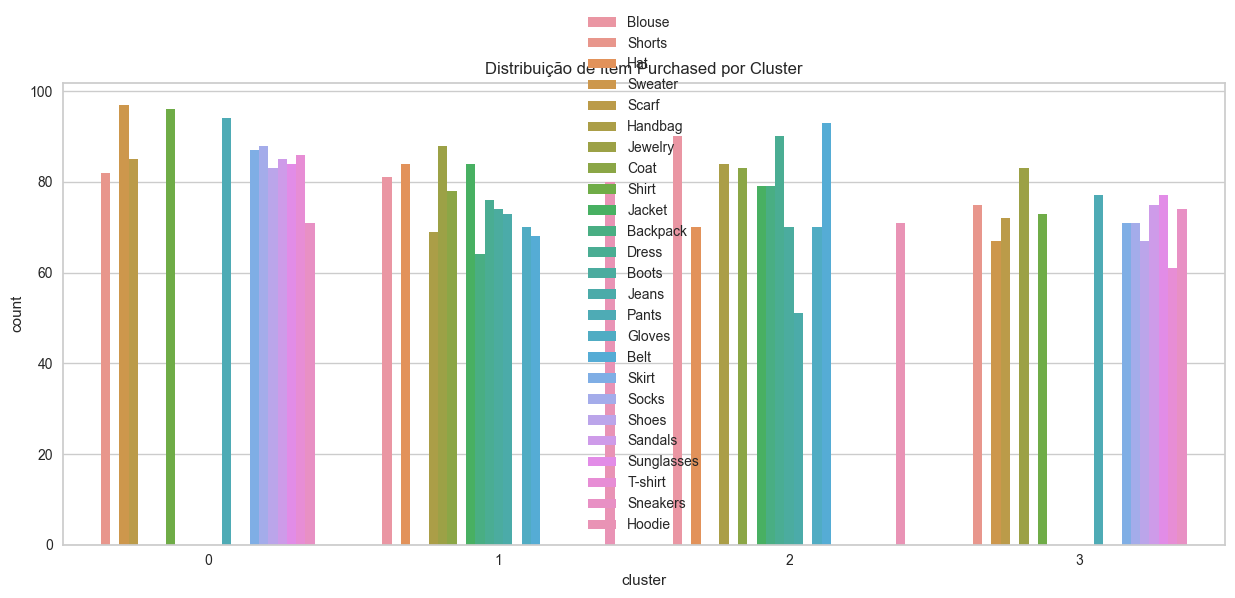

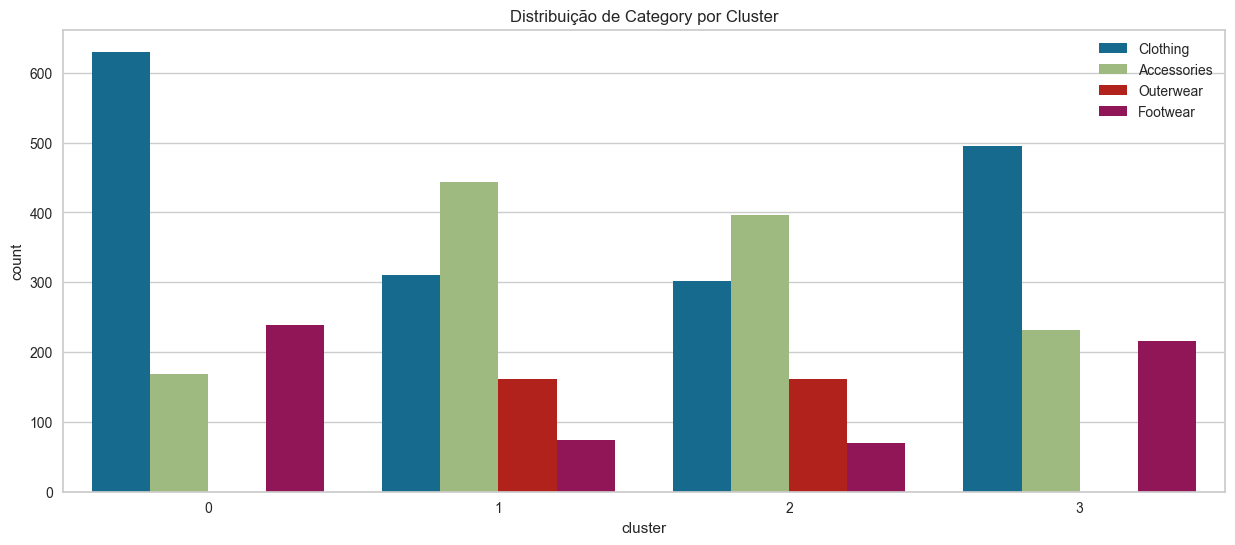

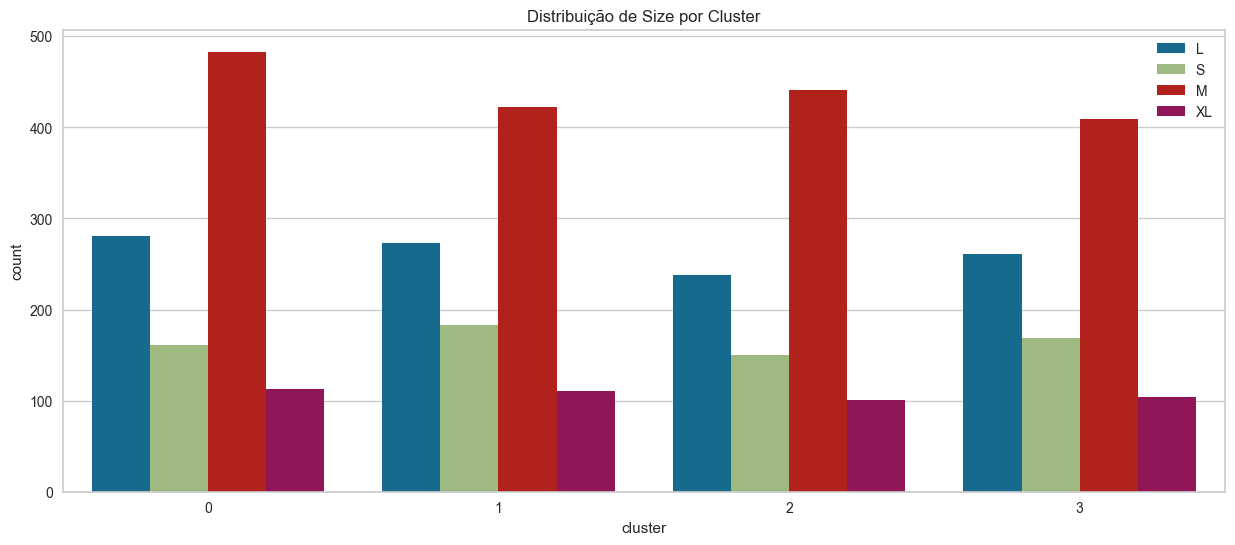

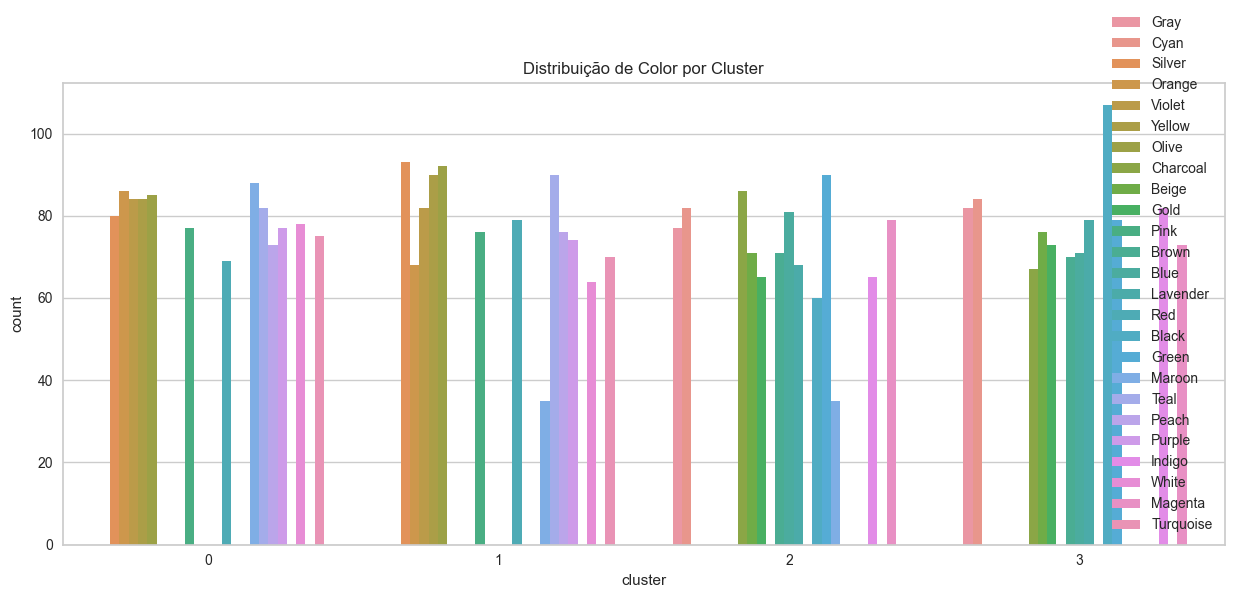

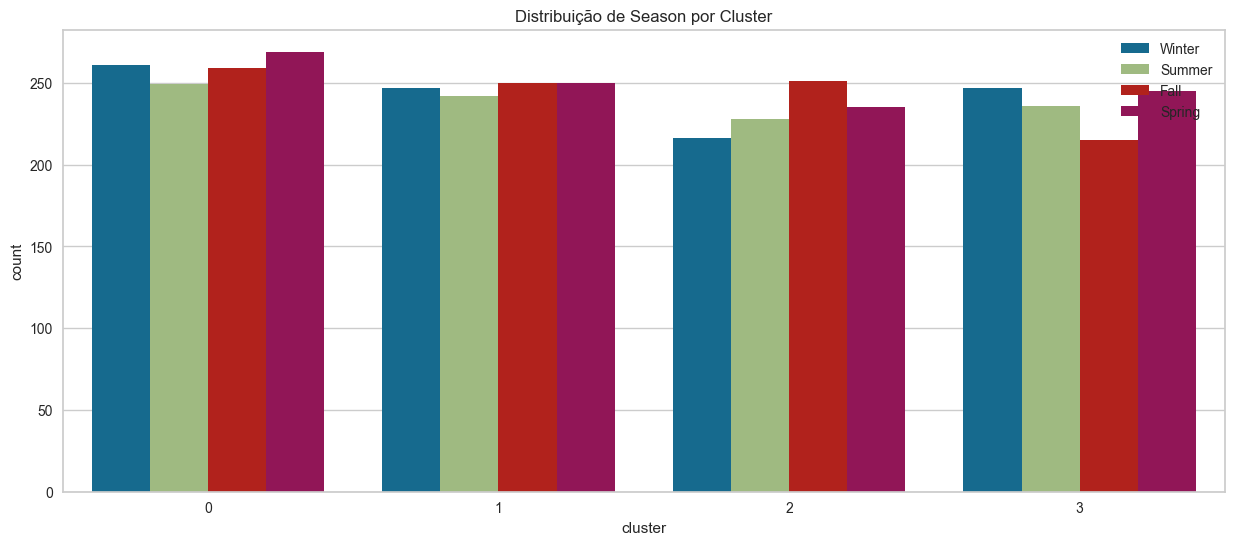

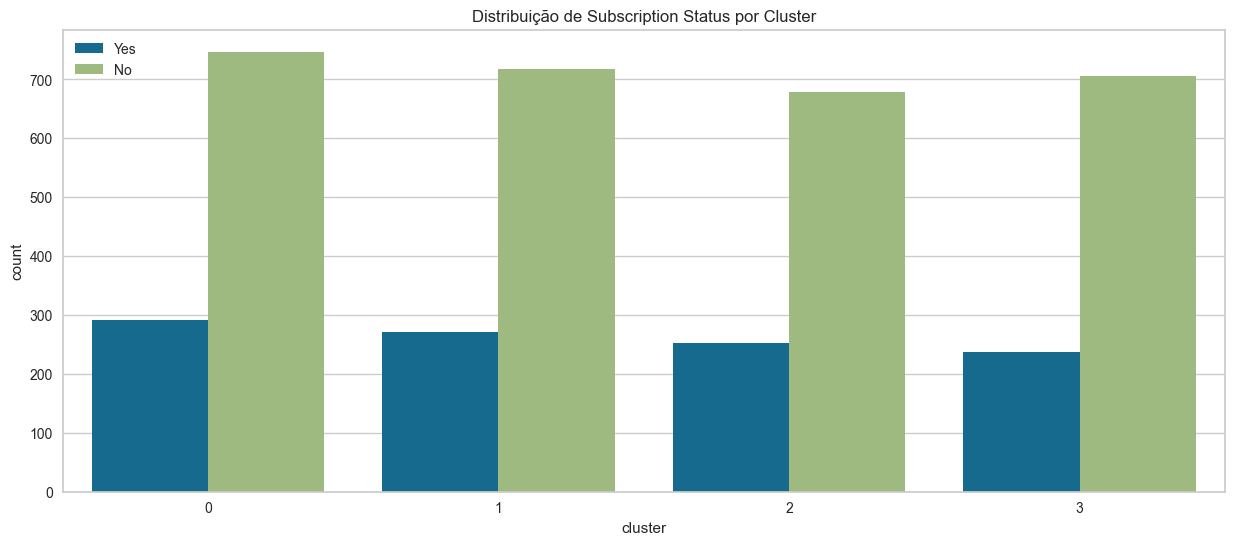

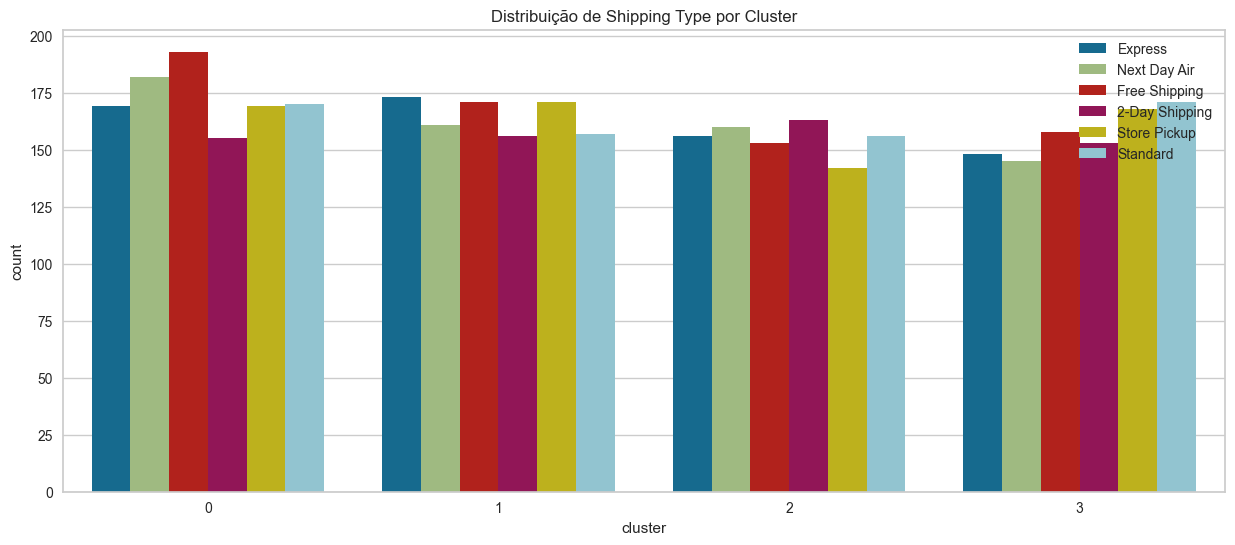

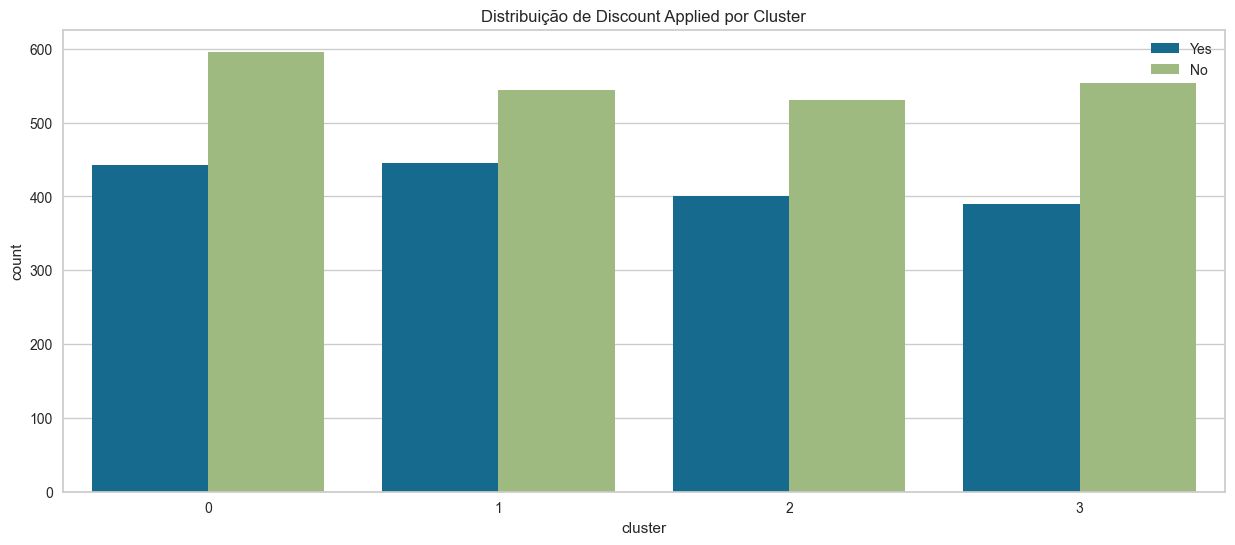

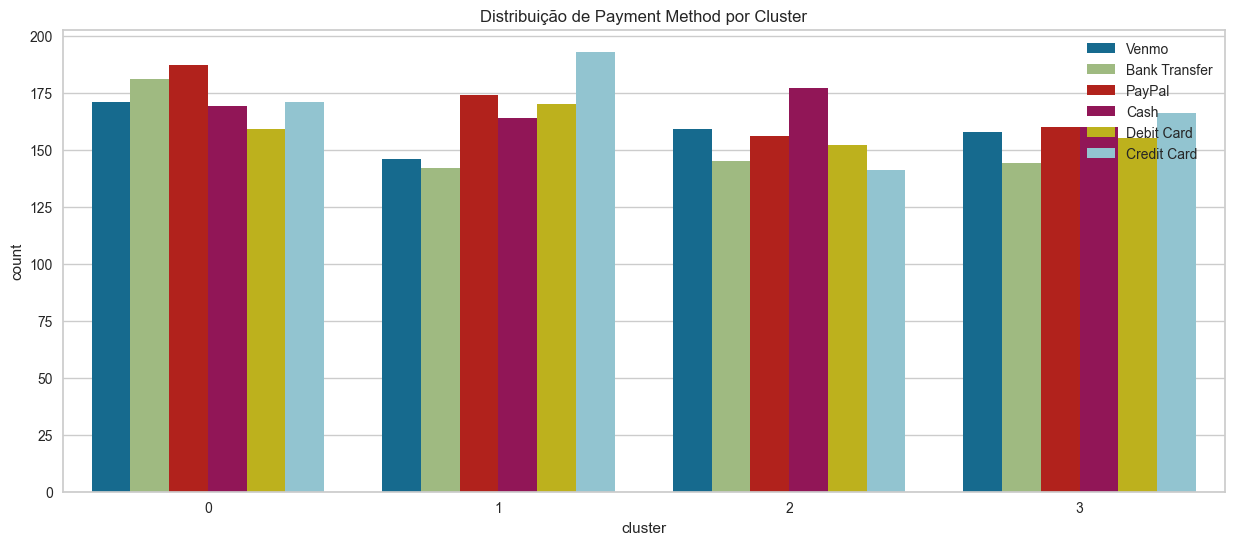

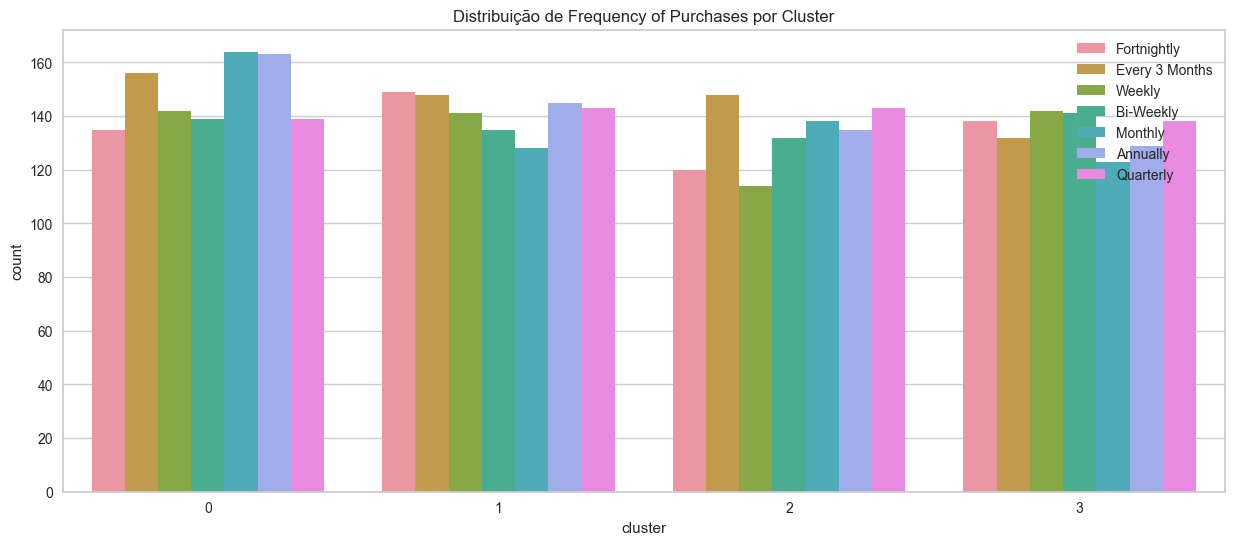

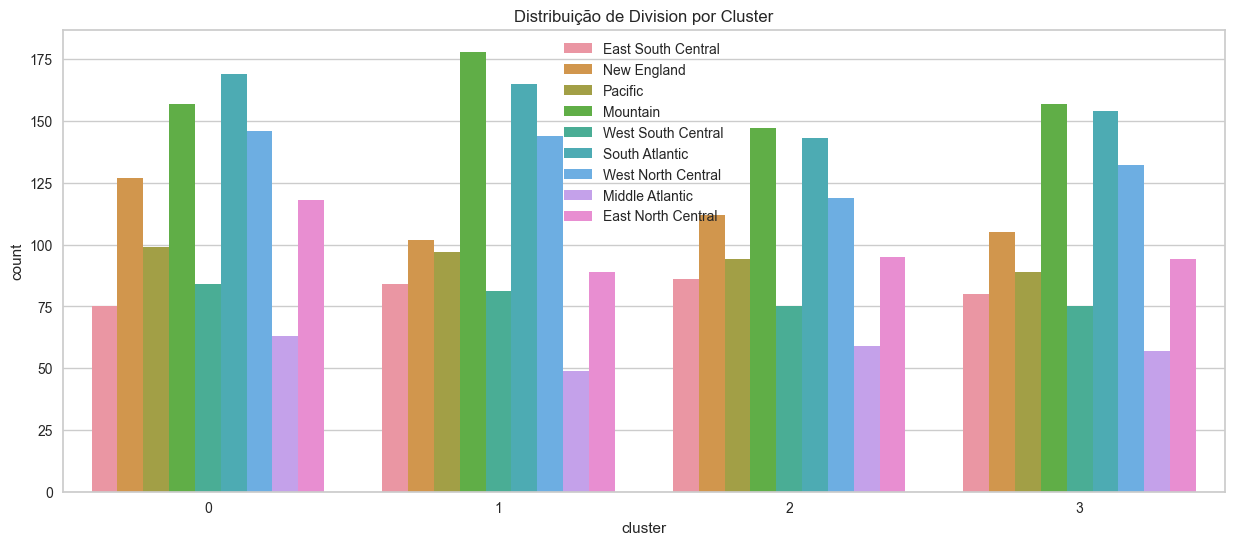

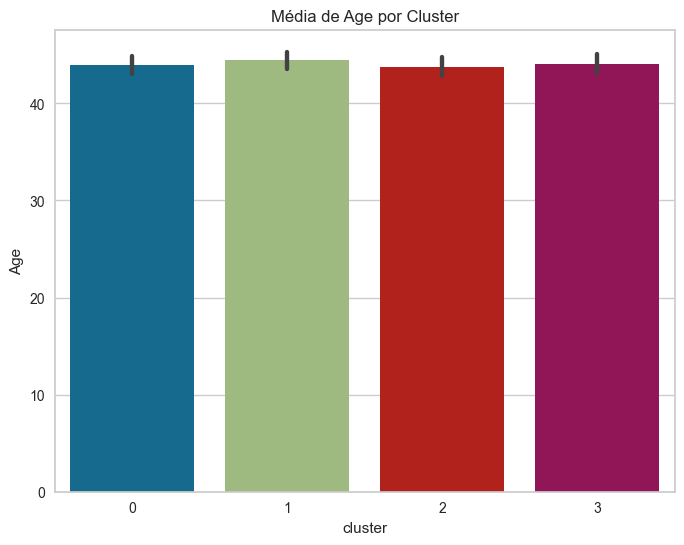

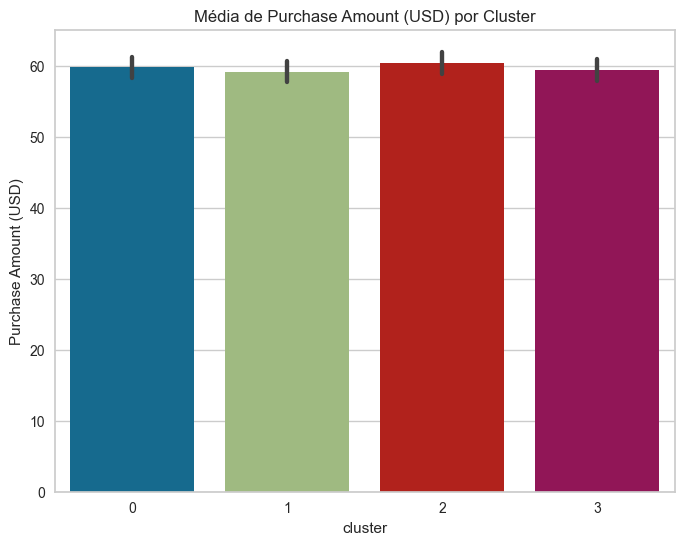

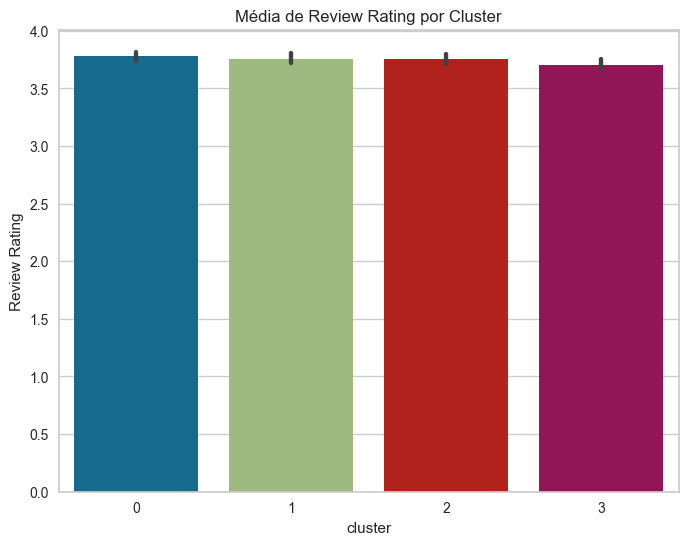

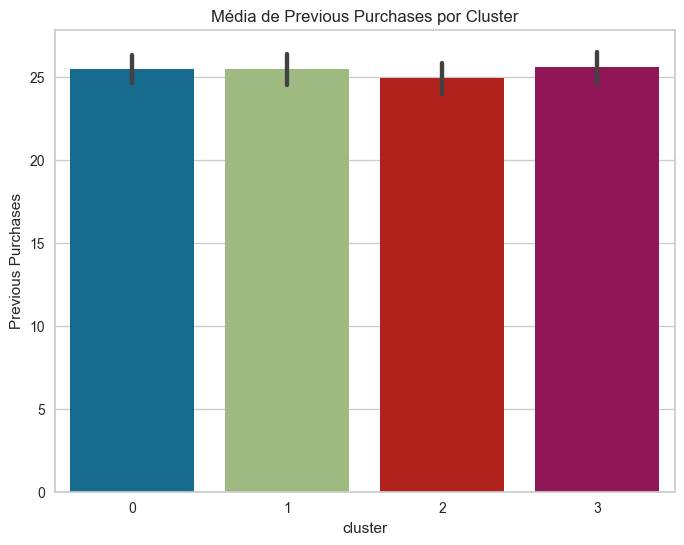

In [ ]:
# Criar gráficos de barras para colunas categóricas
for col in colunas_categoricas:
    plt.figure(figsize=(15, 6))
    sns.countplot(x='cluster', hue=col, data=df_kmeans)
    plt.title(f'Distribuição de {col} por Cluster')
    plt.legend().set_visible(True)
    plt.show()

# Criar gráficos de barras para valores numéricos (média por cluster)
for col in colunas_numericas:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='cluster', y=col, data=df_kmeans)
    plt.title(f'Média de {col} por Cluster')
    plt.show()

## Considerações

Observamos:

1. Para colunas numéricas não há muita diferença entre as médias entre clusters;
2. A maoir diferença está entre as informações de tipo de produto, categoria que está vinculada ao produto, a divisão que é o local da compra e cor que tem muita variação mas algumas cores não estão presentes em todos os clusters finais;
Por exemplo:

O cluster 0 tem mais foco na categoria clothings e zero foco na Outerwear, com um pouco mais de representatividade nos estados correspondentes a divisão South Atlantic;
O cluster 1 tem mais foco na categoria acessorios representatividade nos estados correspondentes a divisão Montain;

Para maiores conclusões se faz necessário mais análises e testes.



*Observações*
*Para tentar melhorar a separação dos clusters,foram feitos vários testes com retirada de  algumas colunas como cor que tem uma grande variação, season por não ter muita variação %, item_Purchase por ter grande variação, porém não houve diferença significativa nos resultados*

## DBSCAN - Densidade de Aplicações com Ruídos

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Normalizer

##### Definição dos parâmetros (LMS): No caso do MinPts, uma boa convenção a ser utilizada para determinar este parâmetro é que seja o dobro da quantidade de atributos que tiver no conjunto de dados. Já para a determinação do epsilon, segundo RAHMAH (2016), pode-se utilizar de métodos como o modelo de Vizinhos Próximos,

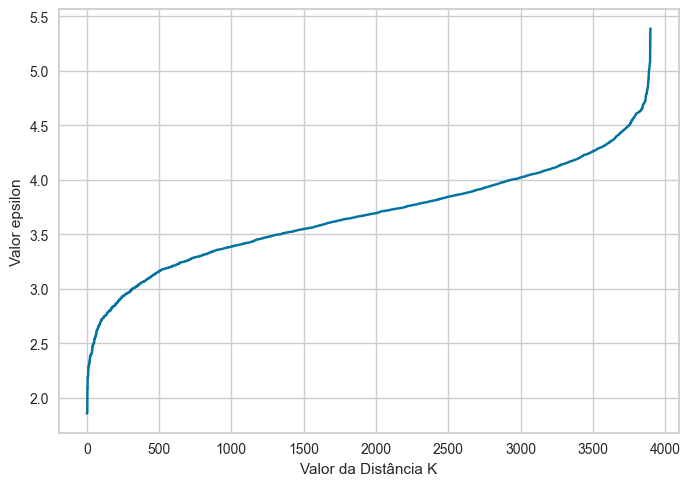

In [ ]:
# Carrega as funções necessárias
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
 
# Instancia o modelo com o número de vizinhos igual ao MinPts = o dobro do numero de features
neighbors = NearestNeighbors(n_neighbors = 32)
 
# Treina o modelo
neighbors_fit = neighbors.fit(X)
 
# Devolve os valores de distância e índices
distances, indices = neighbors_fit.kneighbors(X)
 
# Ordena as distâncias
distances = np.sort(distances, axis = 0)
 
# Cria o gráfico
plt.plot(distances[:, 1])
 
# Cria o nome do eixo X
plt.xlabel("Valor da Distância K")
 
# Cria o nome do eixo X
plt.ylabel("Valor epsilon")
 
# Mostra o gráfico
plt.show()

*O valor de epsilon a ser utilizado seria o valor na inversão de curvatura do gráfico, no caso seria um valor em torno de 4,5*

In [ ]:
#Função para Aplicar o DBSCAN
def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)   
    y_pred = dbscan.fit_predict(X) 
    
    #Verifica se há pelo menos dois clusters
    unique_labels = np.unique(y_pred)
    if len(unique_labels) < 2:
        print(f'Para EPS={eps}, Min Samples = {min_samples}, o DBSCAN não encontrou clusters suficientes')
        return None, None, None, y_pred
    # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

    return silhouette, dunn_index, calinski_harabasz_index, y_pred


In [ ]:
# Testes com diferentes valores de eps e min_samples

eps_values = [4.5, 6, 10] # parte de 4.5, valor da inversão da curva calculada
min_samples_values = [32,64,128] # parte de 32 minpts para gerar metodo de vizinhos próximos

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f'\n--- Resultados para EPS ={eps}, Min Samples={min_samples} ---')
        silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_dbscan(X, eps, min_samples)
        if silhouette is not None:
            print(f'Silhouette Coefficient: {silhouette:.4f}')
            print(f'Dunn Index: {dunn_index:.4f}')
            print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')


--- Resultados para EPS =4.5, Min Samples=32 ---
Para EPS=4.5, Min Samples = 32, o DBSCAN não encontrou clusters suficientes

--- Resultados para EPS =4.5, Min Samples=64 ---
Para EPS=4.5, Min Samples = 64, o DBSCAN não encontrou clusters suficientes

--- Resultados para EPS =4.5, Min Samples=128 ---
Para EPS=4.5, Min Samples = 128, o DBSCAN não encontrou clusters suficientes

--- Resultados para EPS =6, Min Samples=32 ---
Para EPS=6, Min Samples = 32, o DBSCAN não encontrou clusters suficientes

--- Resultados para EPS =6, Min Samples=64 ---
Silhouette Coefficient: 0.1498
Dunn Index: 4.0192
Calinski-Harabasz Index: 2.2552

--- Resultados para EPS =6, Min Samples=128 ---
Silhouette Coefficient: 0.0838
Dunn Index: 4.5364
Calinski-Harabasz Index: 131.3520

--- Resultados para EPS =10, Min Samples=32 ---
Para EPS=10, Min Samples = 32, o DBSCAN não encontrou clusters suficientes

--- Resultados para EPS =10, Min Samples=64 ---
Para EPS=10, Min Samples = 64, o DBSCAN não encontrou clusters

In [ ]:
silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_dbscan(X, 6, 128)
print(f'Silhouette Coefficient: {silhouette:.4f}')
print(f'Dunn Index: {dunn_index:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')

Silhouette Coefficient: 0.0838
Dunn Index: 4.5364
Calinski-Harabasz Index: 131.3520


In [ ]:
valores_unicos = np.unique(y_pred)
valores_unicos

array([-1,  0], dtype=int64)

## Considerações

*Mesmo utilizando o método de de izinhos próximos para encontrar o eps, apesar de conseguir rodas com a combinação eps 6 e minpts 64 e 128, observamos que as classes geradas é -1 (considerado ruído) e  0, ou seja, não conseguimos gerar mais do que um cluster utilizando o DBSCAN.

## Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Função para aplicar o Agglomerative Clustering e calcular métricas

def apply_agglomerative(X, n_clusters, linkage_method):
    ag = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkage_method)
    y_pred = ag.fit_predict(X)
    
  # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)
    
    return silhouette, dunn_index, calinski_harabasz_index, y_pred

In [ ]:
# Testes com diferentes métodos de linkage
linkage_methods = ['single', 'complete','average']

for linkage_method in linkage_methods:
    print(f'\n--- Resultados para Lnkage Method: {linkage_method} ---')
    
    n_clusters = 4 # mesmo do K-means
    silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_agglomerative(X, n_clusters,linkage_method)
    
    print(f'Silhouette Coefficient: {silhouette:.4f}')
    print(f'Dunn Index: {dunn_index:.4f}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')    
    


--- Resultados para Lnkage Method: single ---
Silhouette Coefficient: -0.0617
Dunn Index: 0.7800
Calinski-Harabasz Index: 1.5966

--- Resultados para Lnkage Method: complete ---
Silhouette Coefficient: 0.2152
Dunn Index: 1.1258
Calinski-Harabasz Index: 1608.8805

--- Resultados para Lnkage Method: average ---
Silhouette Coefficient: 0.2354
Dunn Index: 1.1718
Calinski-Harabasz Index: 1742.3137


In [ ]:
#### Melhor resultado com Average

n_clusters = 4 # mesmo do K-means
silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_agglomerative(X, n_clusters,'average')

In [ ]:
y_pred

array([0, 2, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
df_ag = df_original.copy()

In [ ]:
df_ag['cluster'] = y_pred

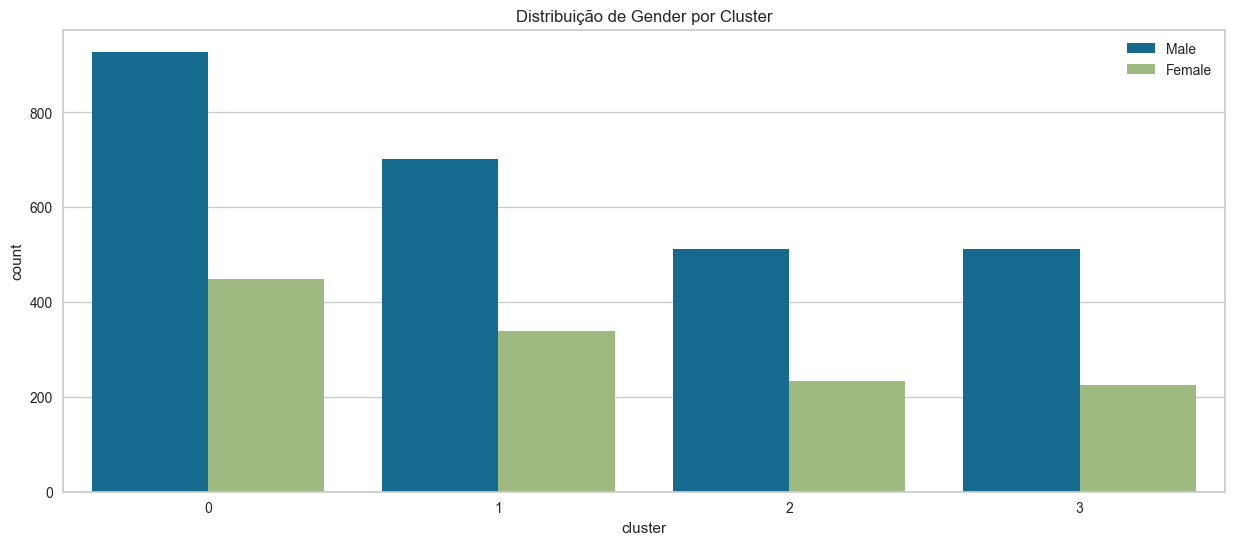

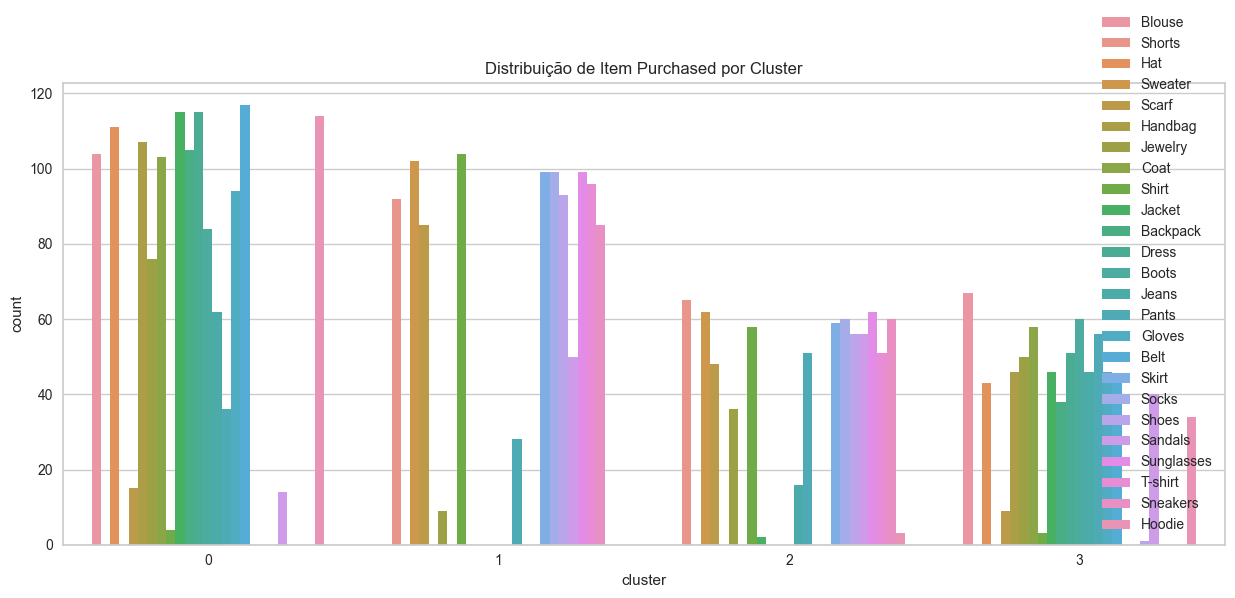

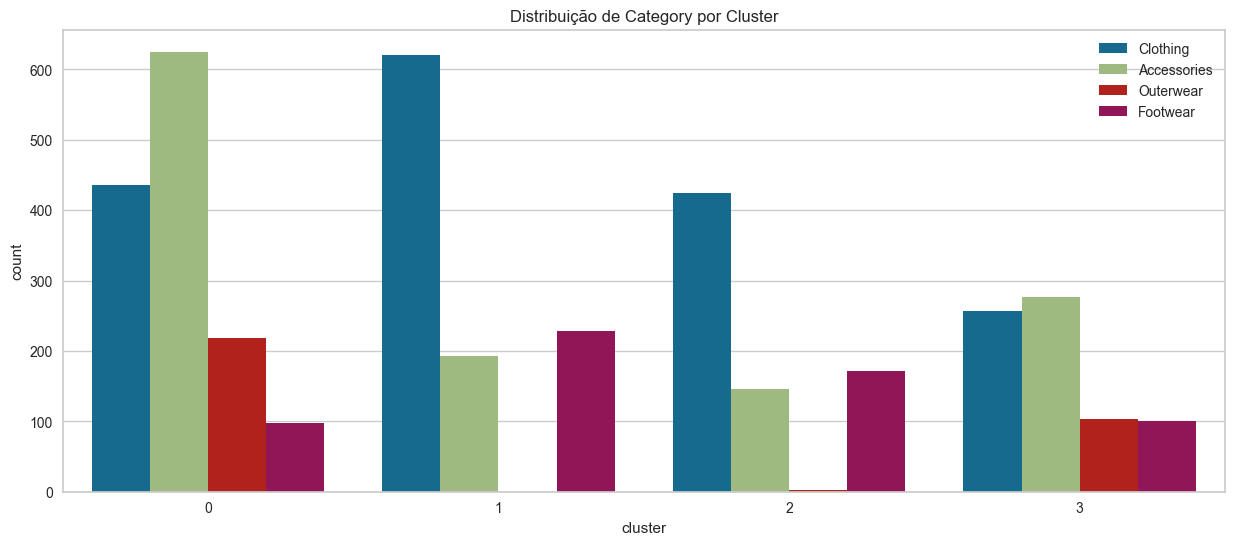

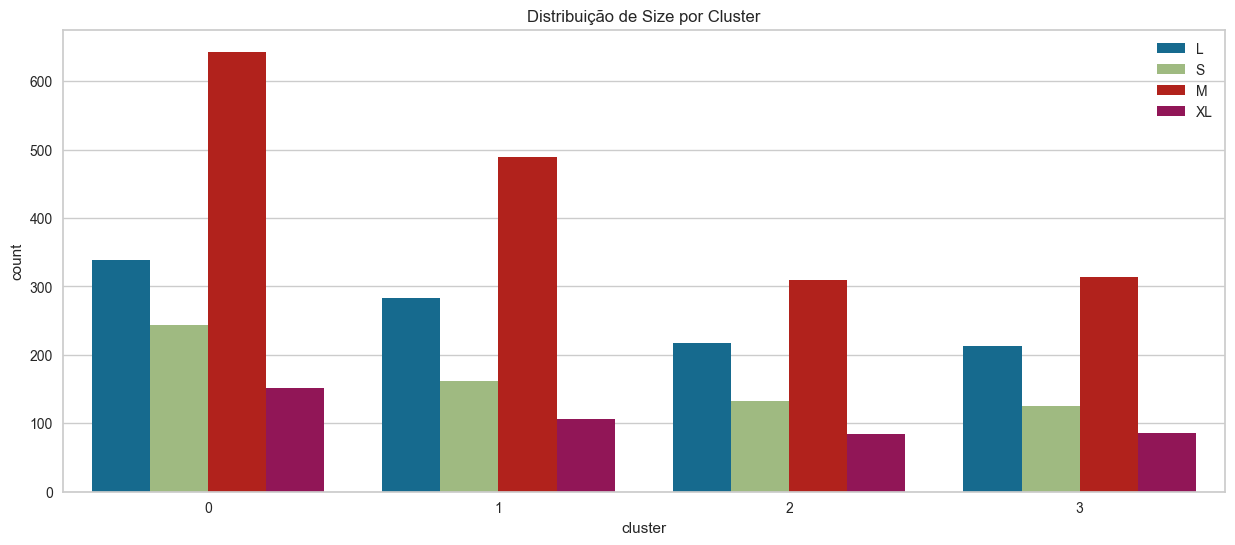

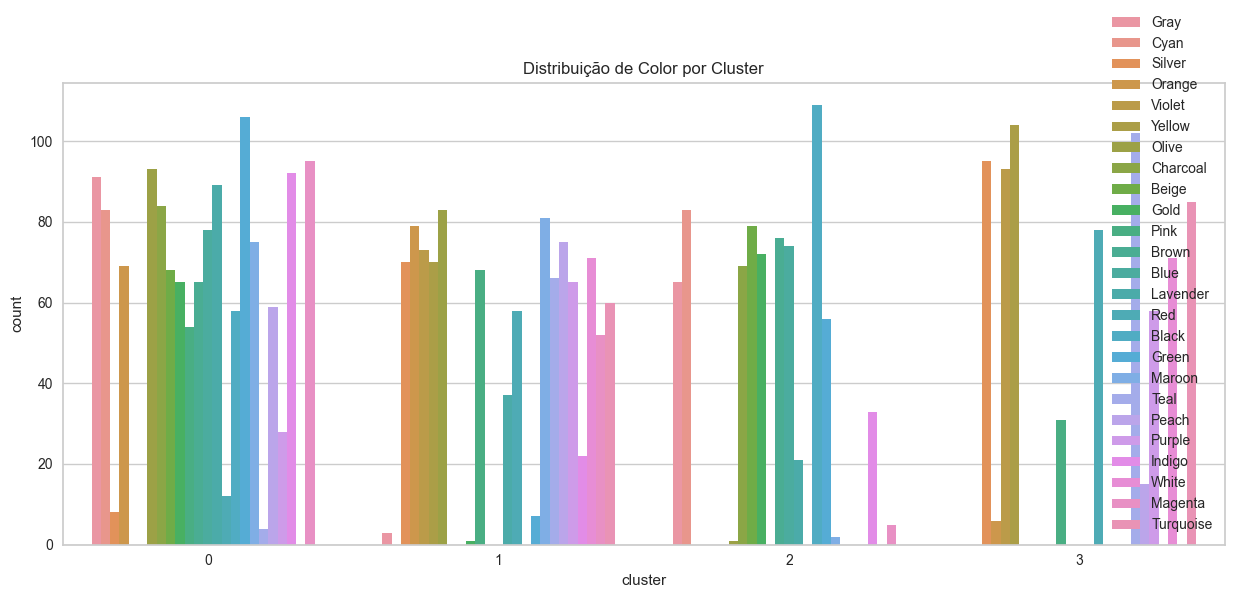

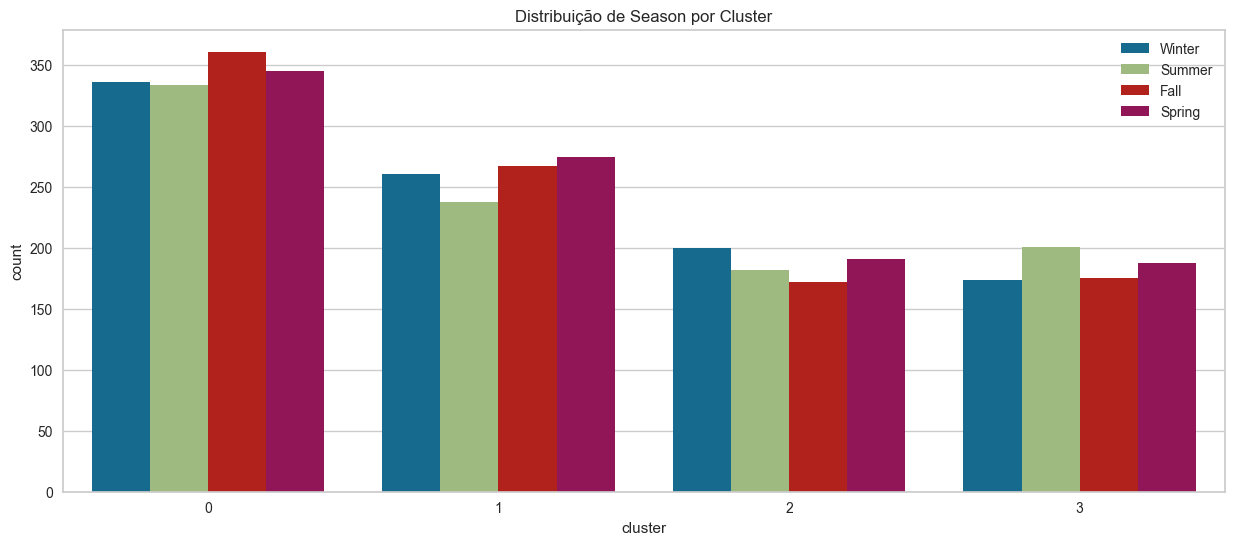

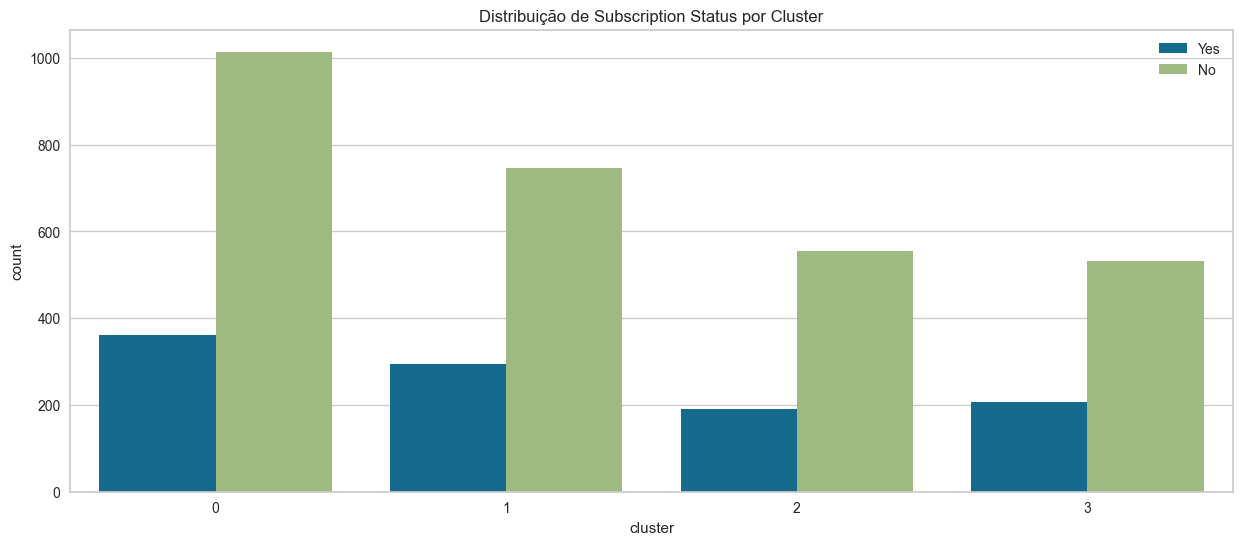

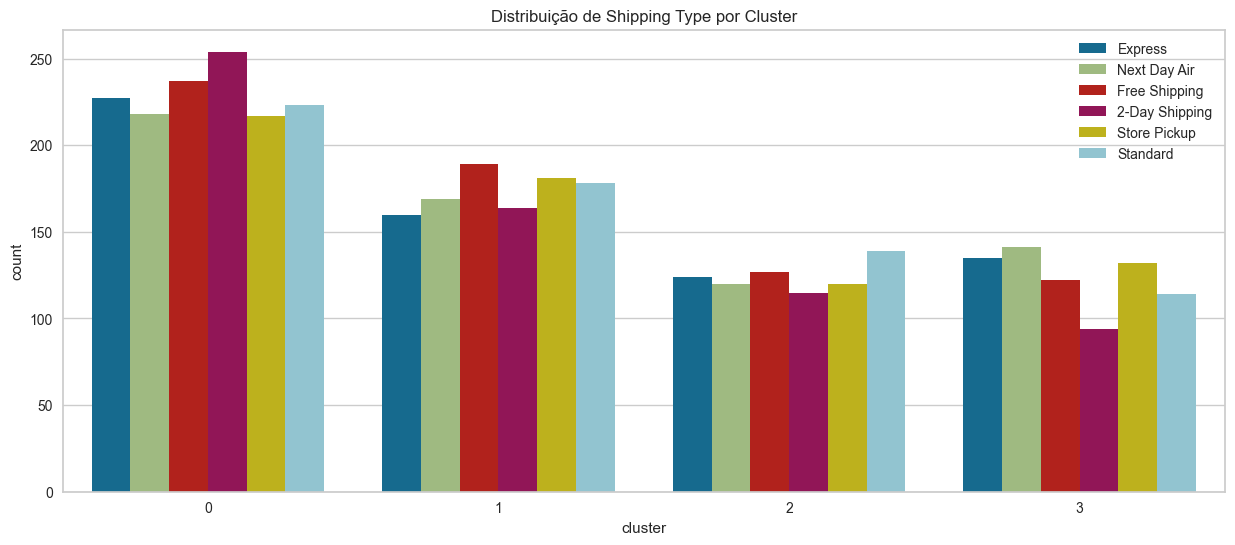

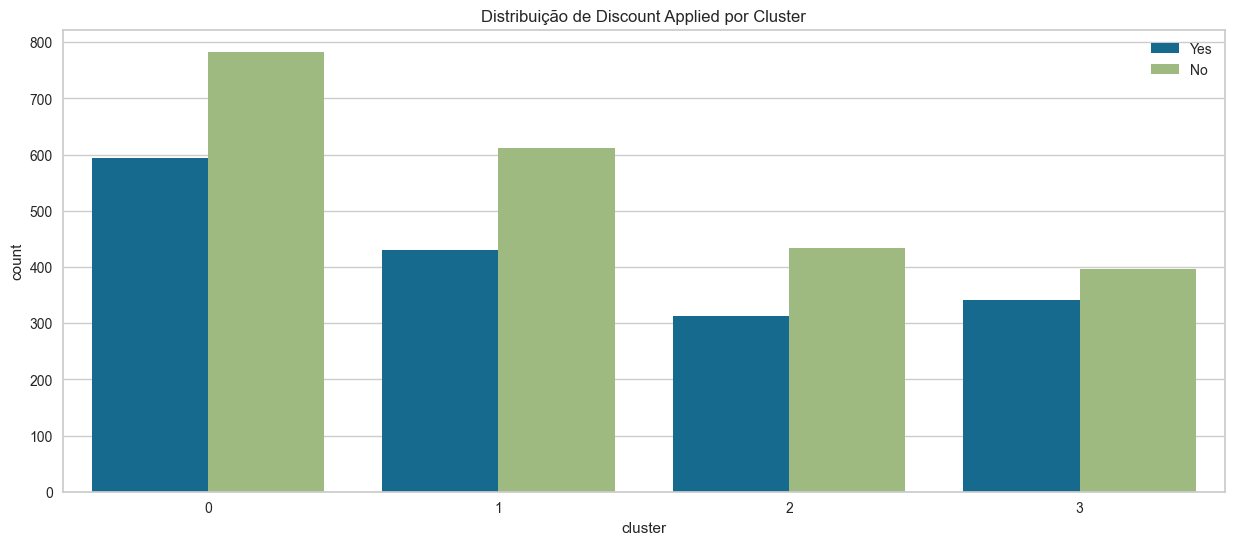

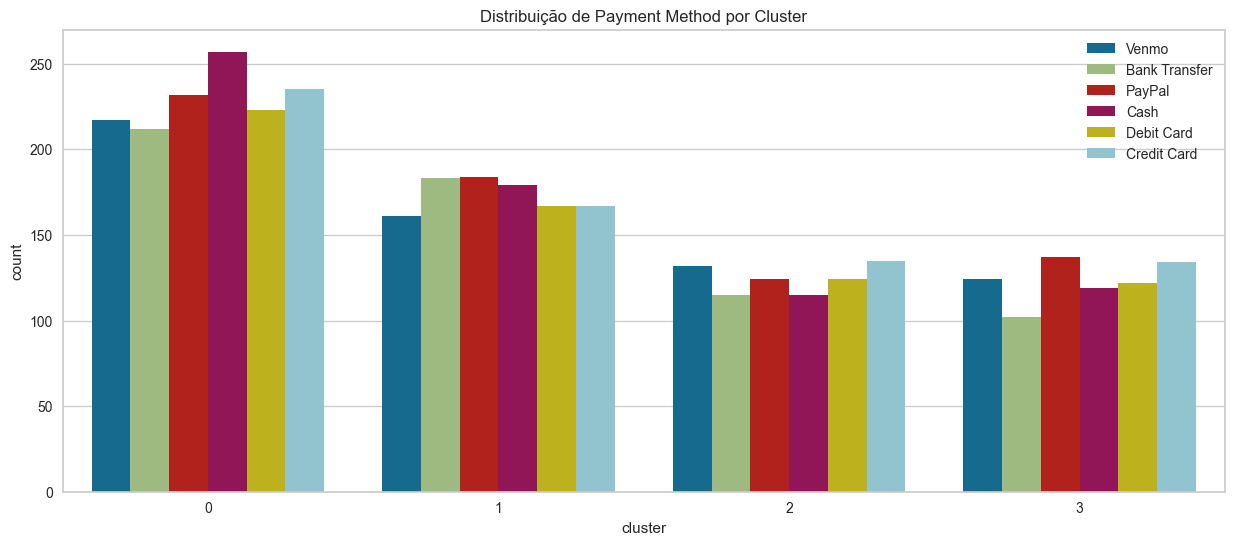

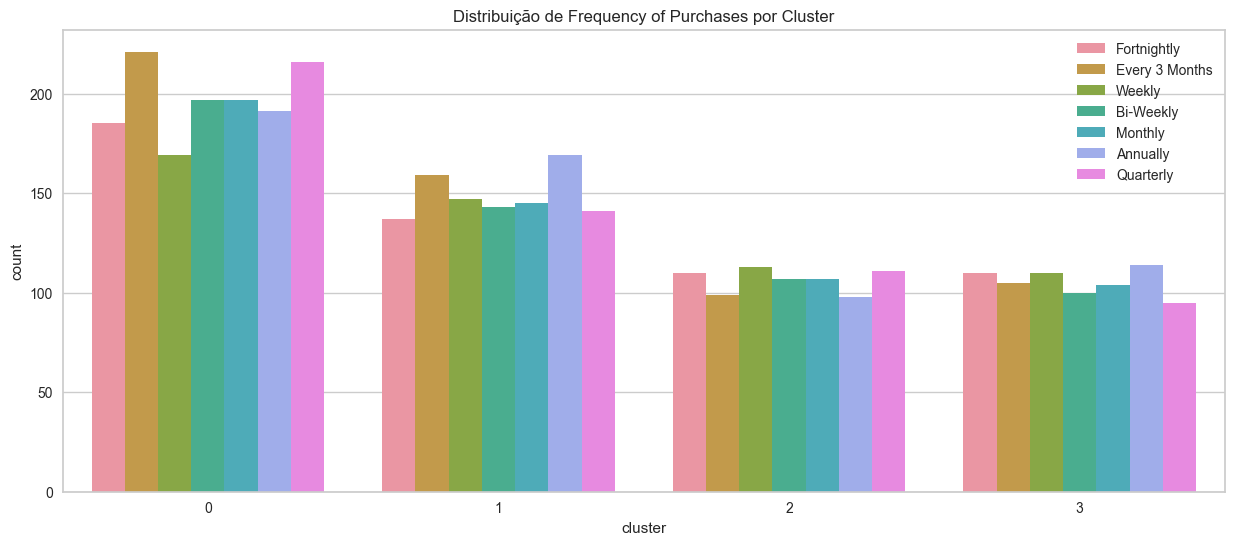

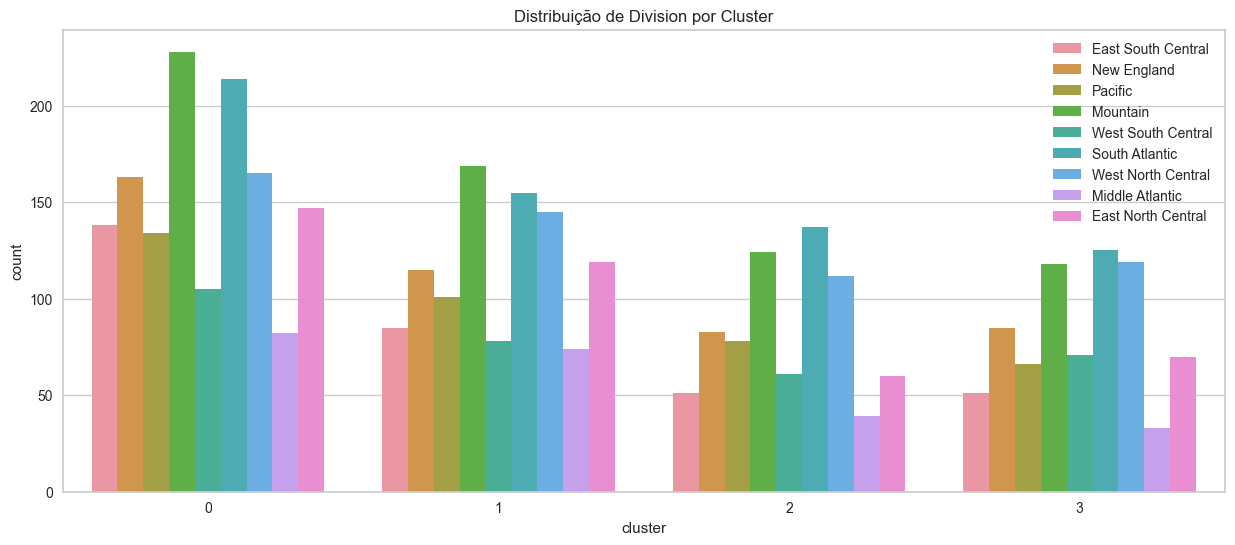

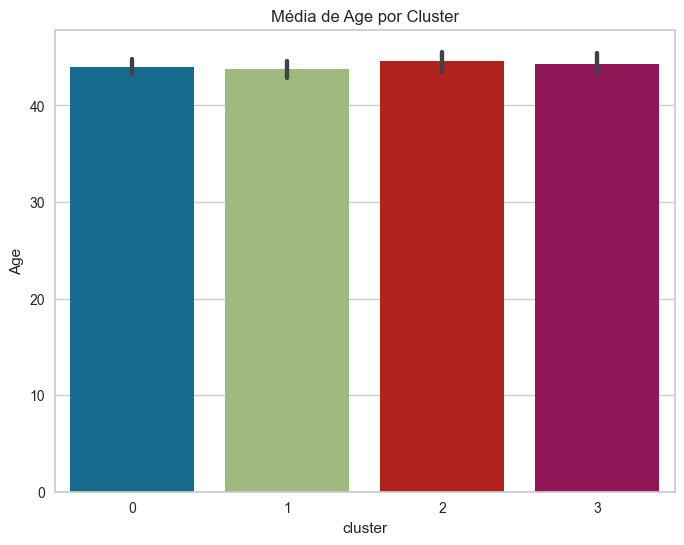

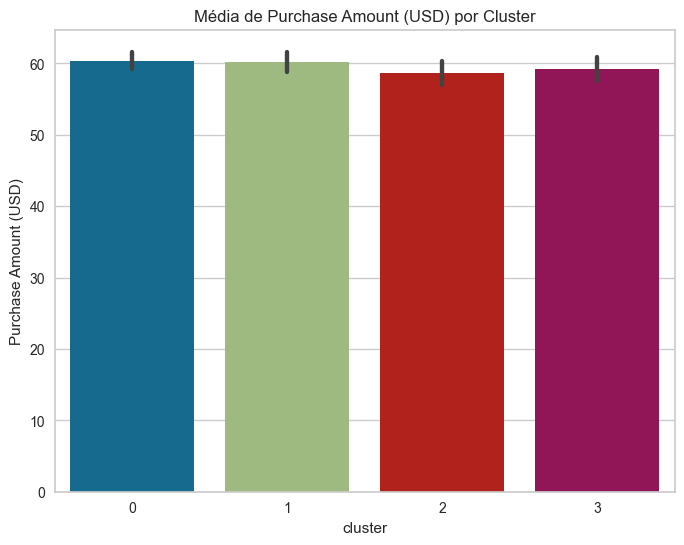

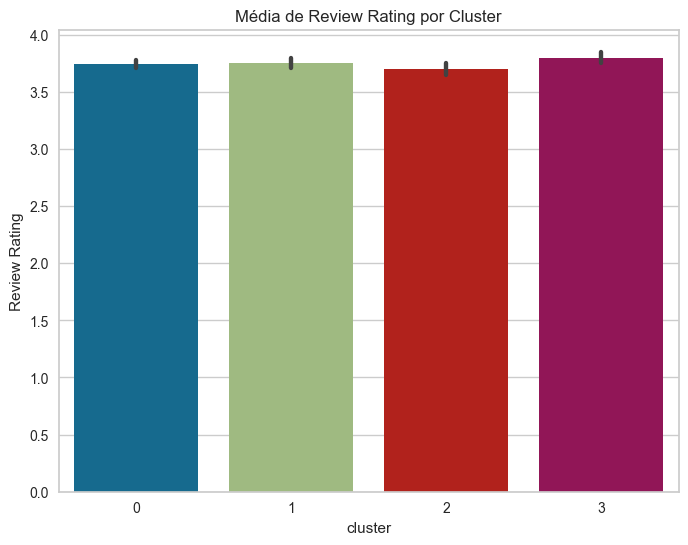

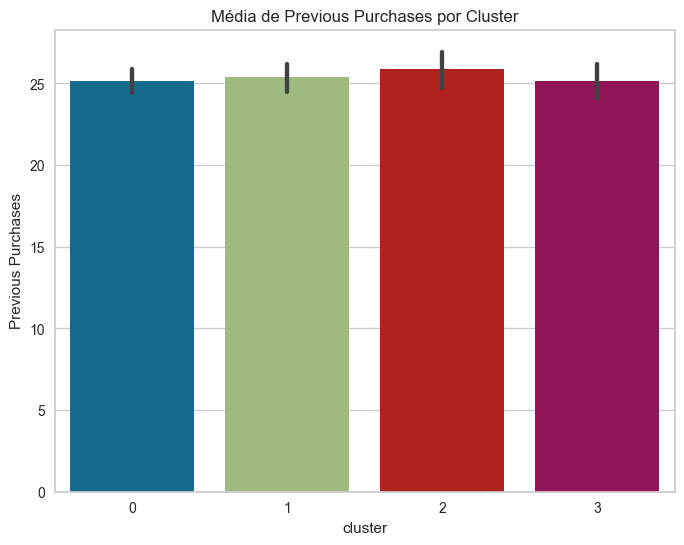

In [ ]:
# Criar gráficos de barras para colunas categóricas
for col in colunas_categoricas:
    plt.figure(figsize=(15, 6))
    sns.countplot(x='cluster', hue=col, data=df_ag)
    plt.title(f'Distribuição de {col} por Cluster')
    plt.legend().set_visible(True)
    plt.show()

# Criar gráficos de barras para valores numéricos (média por cluster)
for col in colunas_numericas:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='cluster', y=col, data=df_ag)
    plt.title(f'Média de {col} por Cluster')
    plt.show()

## Considerações

Observamos um resultado muito parecido com o k-means:

1. Para colunas numéricas não há muita diferença entre as médias entre clusters;
2. A maior diferença está entre as informações de tipo de produto, categoria que está vinculada ao produto, a divisão que é o local da compra e cor que tem muita variação mas algumas cores não estão presentes em todos os clusters finais;
